In [1]:
import numpy as np
import pandas as pd


In [3]:
mcdonalds = pd.read_csv("mcdonalds.csv")
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
print(mcdonalds.shape)

(1453, 15)


In [6]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [8]:
MD = mcdonalds.iloc[:, 0:11].apply(lambda x: (x== "Yes") + 0).values
col_means = np.round(np.mean(MD, axis = 0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [12]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD)
print(pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [11]:
print(np.round(pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


In [10]:
print(np.sqrt(pca.explained_variance_))

[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]


In [13]:
print(np.round(pca.components_.T, 2))

[[-0.48  0.36 -0.3   0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05]
 [-0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54]
 [-0.01  0.02 -0.04  0.2   0.07 -0.36  0.71  0.38  0.4  -0.08  0.14]
 [ 0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25]
 [ 0.3  -0.06 -0.8   0.25  0.36  0.21  0.04 -0.14 -0.    0.01  0.  ]
 [-0.11 -0.09 -0.06 -0.1   0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34]
 [-0.34 -0.61 -0.15  0.12 -0.13 -0.1  -0.04  0.14  0.08  0.43 -0.49]
 [-0.47  0.31 -0.29 -0.   -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02]
 [ 0.33  0.6   0.02  0.07 -0.   -0.26 -0.07  0.03  0.07  0.45 -0.49]
 [-0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16]
 [ 0.37 -0.14 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04]]


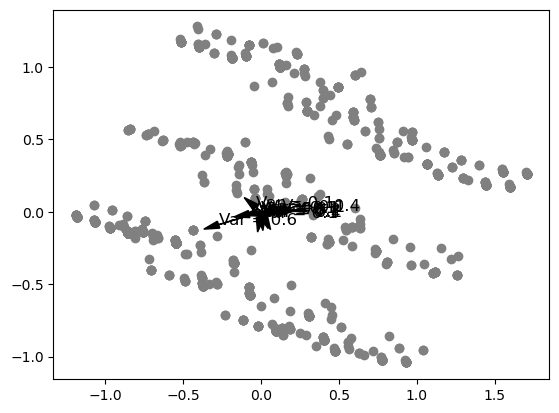

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
MD_pca = PCA() # Create PCA object
MD_pca.fit(MD) # Fit the PCA object with data
# Plot the predicted values from PCA with grey color
plt.scatter(MD_pca.transform(MD)[:, 0], MD_pca.transform(MD)[:, 1], c='grey')

# Plot projection axes
for length, vector in zip(MD_pca.explained_variance_, MD_pca.components_):
    proj = length * vector
    plt.arrow(0, 0, proj[0], proj[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.text(proj[0], proj[1], "Var = {:.1f}".format(length), fontsize=12)
    
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from SKlearn.metrics import silhoette_score
import numpy as np
np.random.seed(1234)
results = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD)
    results[k] = silhouette_score(MD, kmeans.labels_)

best_k = max(results, key=results.get)
MD_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=1234)
MD_kmeans.fit(MD)



In [32]:
conda install -c conda-forge yellowbrick


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\91782\anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pynndescent-0.5.8          |     pyh1a96a4e_0          47 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    umap-learn-0.5.3           |   py39hcbf5309_0         132 KB  conda-forge
    yellowbrick-1.5            |     pyhd8ed1ab_0         160 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         343 KB

The following NEW packages will be INSTALLED:

  pynndescent        conda-forge/noarch::pynndescent-0.5.8-pyh1a96a4e_0 None
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None
  umap-learn         conda-forge/win-64::umap-learn-0.5.3-py39hcb



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [16]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=1234), k=(2, 8))
visualizer.fit(MD)
visualizer.show()

     

ModuleNotFoundError: No module named 'yellowbrick'

In [25]:
from sklearn.cluster import KMeans
from sklearn.utils import resample

kmeans = KMeans(n_clusters=2, random_state=1234)

bootstrapped_scores = []
for i in range(n_bootstrapped_scores):
    X_boot = resample(MD, replace=True, n_samples=len(MD), random_state=i)
    labels = kmeans.fit_predict(X_boot)
    score = kmeans.score(X_boot)
    bootstrapped_scores.append(score)

NameError: name 'n_bootstrapped_scores' is not defined

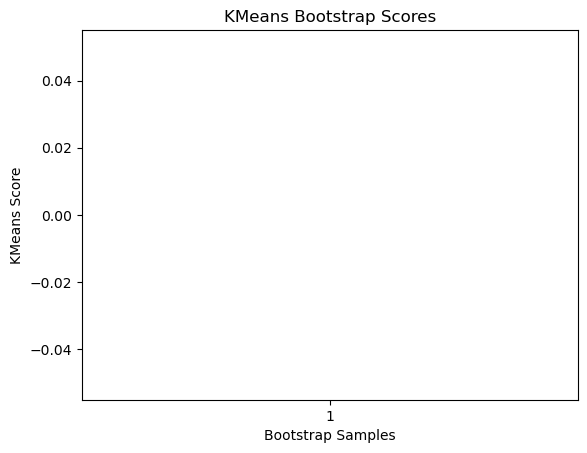

In [26]:
import matplotlib.pyplot as plt

# create boxplot
plt.boxplot(bootstrapped_scores)

# add labels and title
plt.xlabel('Bootstrap Samples')
plt.ylabel('KMeans Score')
plt.title('KMeans Bootstrap Scores')

# display plot
plt.show()

In [22]:
library(flexclust)

# Assuming MD.km28 is the result of the k-means clustering with 4 clusters
plotCluster(MD.km28, which.plot == 4, data = MD, xlim = c(0,1))


NameError: name 'library' is not defined

In [35]:
#step5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bioinfokit as bio
import seaborn as sns

In [29]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [34]:
conda install -c bioconda bioinfokit

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [36]:
dataset = pd.read_csv("mcdonalds.csv")
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [38]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [39]:
dataset.mean()

C:\Users\91782\AppData\Local\Temp\ipykernel_5824\1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


Age    44.604955
dtype: float64

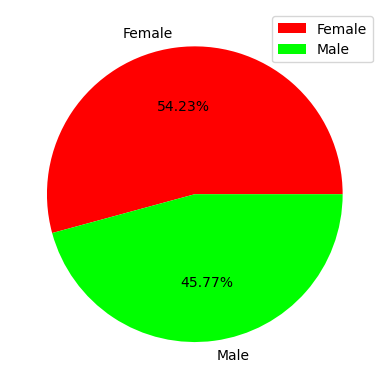

In [42]:
Gender = ["Female", "Male"]
Colors = [(1.0, 0.0, 0.0), (0.0, 1.0, 0.0)]
Size = dataset["Gender"].value_counts()
plt.pie(Size, labels=Gender, colors=Colors, autopct="%.2f%%")
plt.legend()
plt.show()

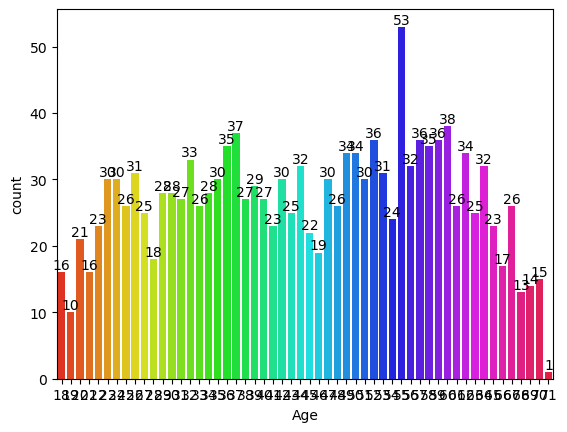

In [43]:
f = sns.countplot(x=dataset["Age"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)

In [44]:
dataset["Like"]=dataset["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})
dataset.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
    
for i in cols:
    dataset[i]=le.fit_transform(dataset[i])

In [46]:
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


array([[<AxesSubplot:title={'center':'yummy'}>,
        <AxesSubplot:title={'center':'convenient'}>,
        <AxesSubplot:title={'center':'spicy'}>],
       [<AxesSubplot:title={'center':'fattening'}>,
        <AxesSubplot:title={'center':'greasy'}>,
        <AxesSubplot:title={'center':'fast'}>],
       [<AxesSubplot:title={'center':'cheap'}>,
        <AxesSubplot:title={'center':'tasty'}>,
        <AxesSubplot:title={'center':'expensive'}>],
       [<AxesSubplot:title={'center':'healthy'}>,
        <AxesSubplot:title={'center':'disgusting'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

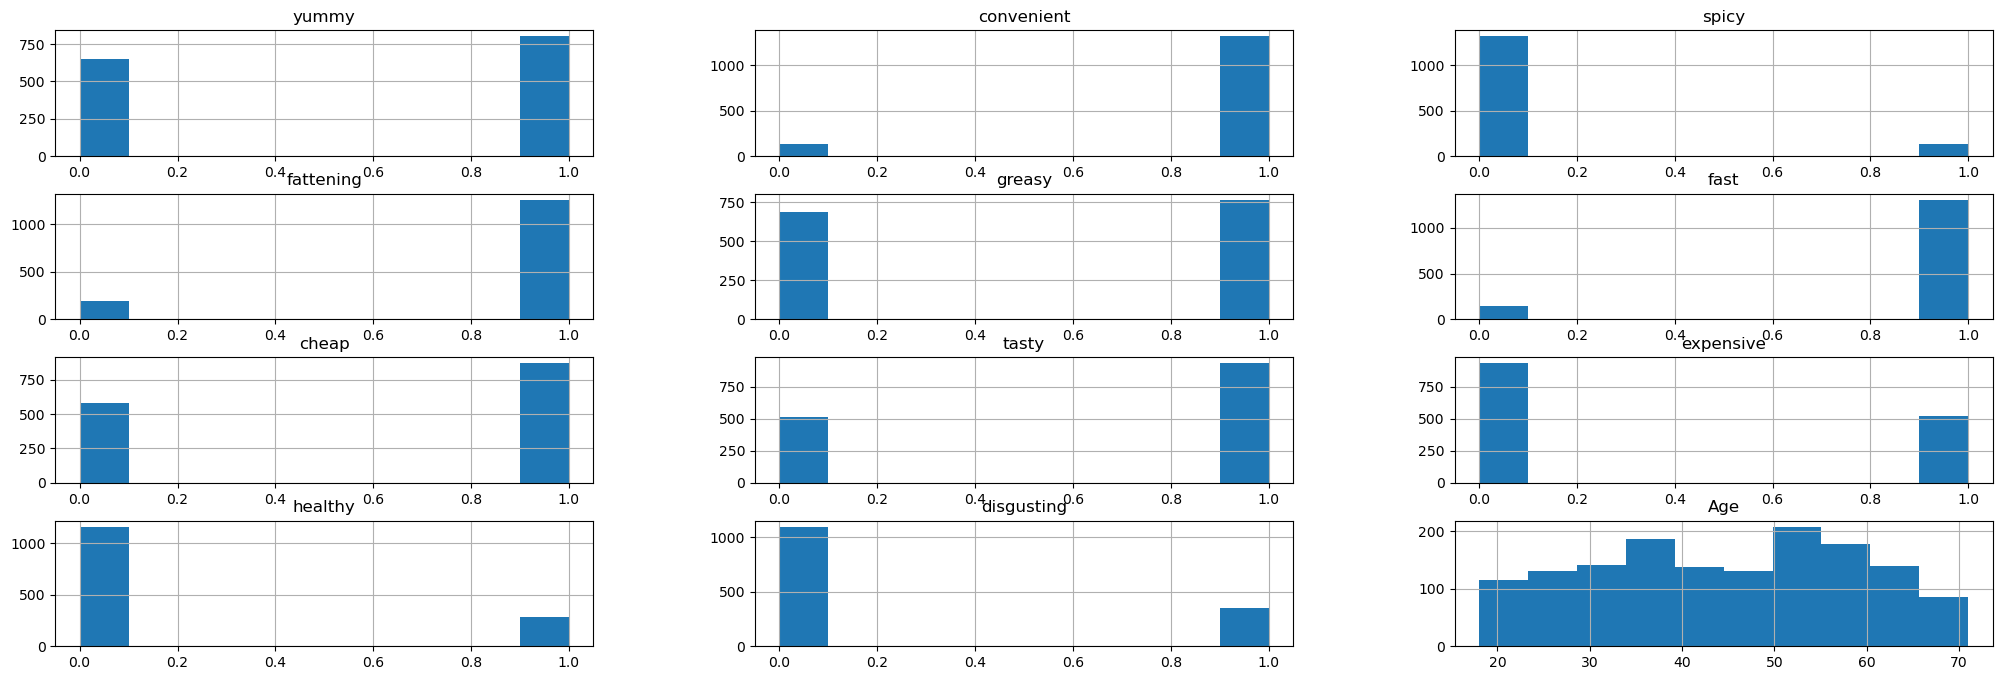

In [47]:
dataset.hist()

In [48]:
x = dataset.loc[:, cols]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [49]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]
pf = pd.DataFrame(data=pc, columns=names)
pf


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [50]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [51]:
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [52]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [53]:
components = pca.components_
num_pc = pca.n_features_
pc_name = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame

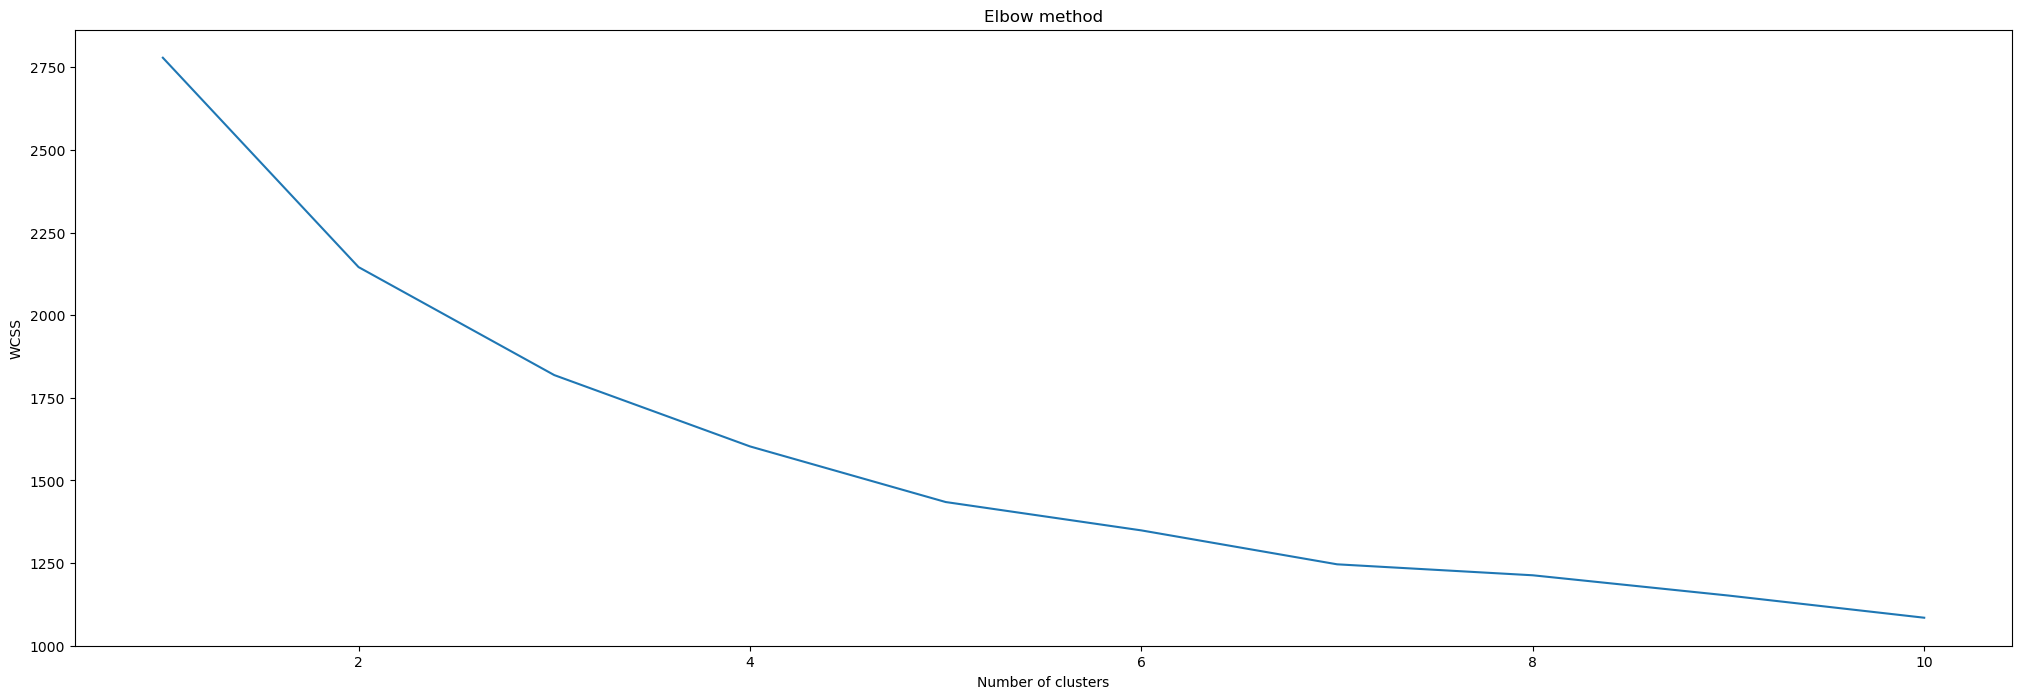

In [55]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [56]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)
dataset['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 0 0 ... 0 1 3]
1603.0604440558945
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [57]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

In [58]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


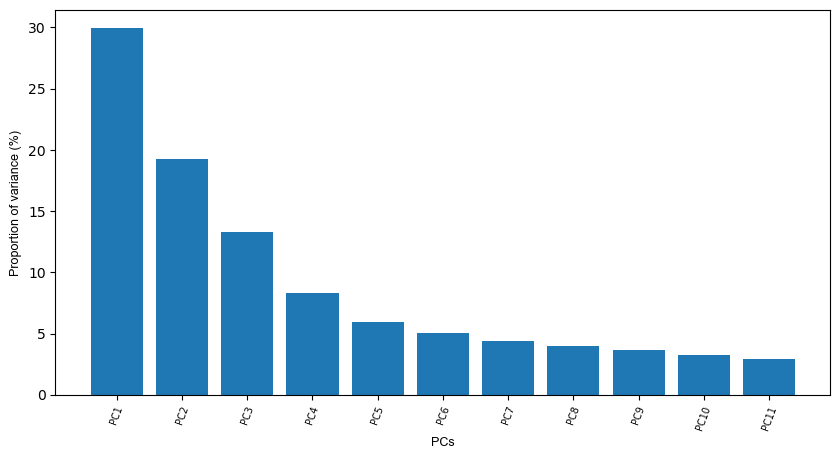

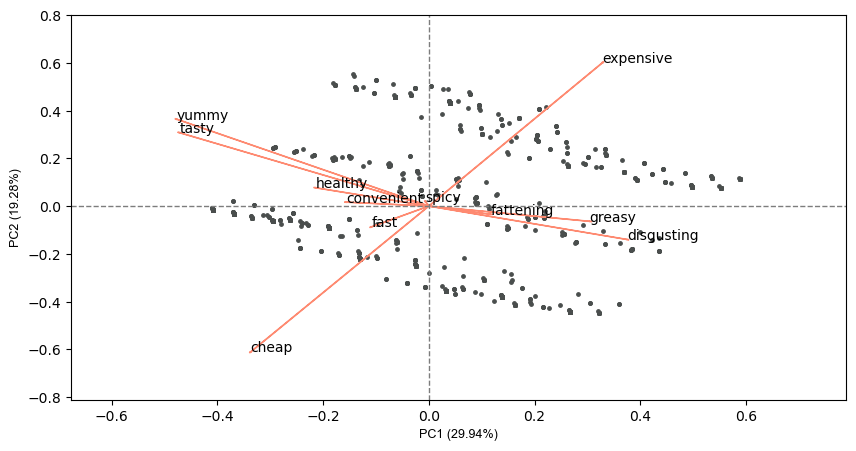

In [59]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=dataset.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

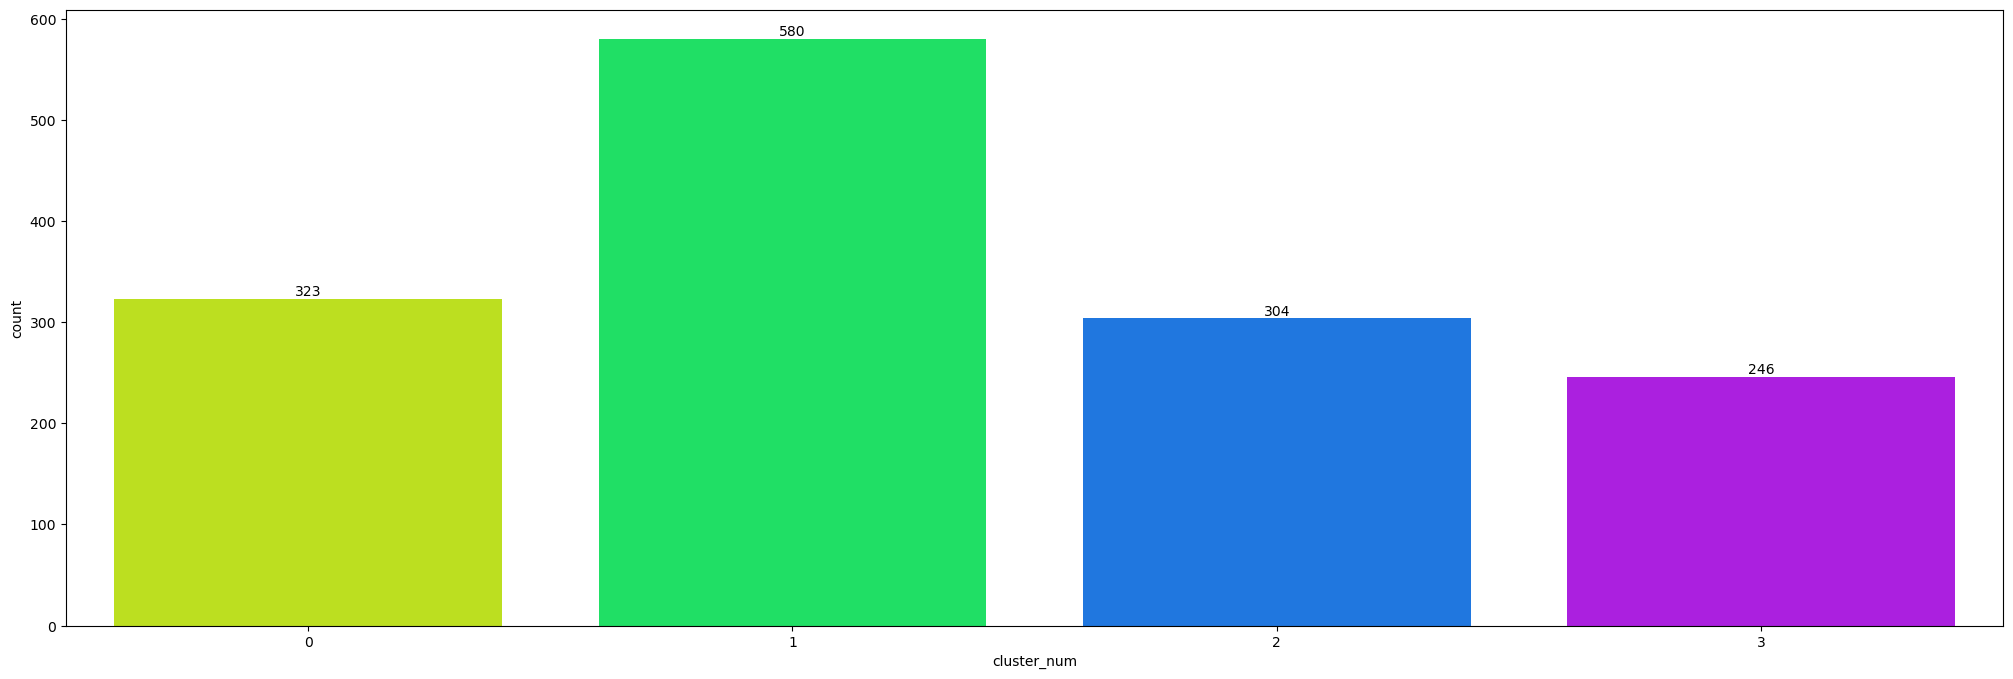

In [60]:
f = sns.countplot(x=dataset["cluster_num"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)

In [61]:
dataset1=pd.get_dummies(dataset, prefix=['cluster_num'], columns=['cluster_num'])
dataset1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,0,1,0,0


In [62]:
#Gender
# df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
result=[]
for i in cols:
    Gender = dataset.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

In [63]:
for i in range(len(result)):
    print(pd.DataFrame(result[i]))

   cluster_num     yummy
0            0  0.854489
1            1  0.887931
2            2  0.023026
3            3  0.020325
   cluster_num  convenient
0            0    0.962848
1            1    0.981034
2            2    0.891447
3            3    0.682927
   cluster_num     spicy
0            0  0.133127
1            1  0.086207
2            2  0.072368
3            3  0.085366
   cluster_num  fattening
0            0   0.907121
1            1   0.794828
2            2   0.924342
3            3   0.914634
   cluster_num    greasy
0            0  0.619195
1            1  0.329310
2            2  0.667763
3            3  0.695122
   cluster_num      fast
0            0  0.860681
1            1  0.960345
2            2  0.963816
3            3  0.731707
   cluster_num     cheap
0            0  0.108359
1            1  0.922414
2            2  0.934211
3            3  0.065041
   cluster_num     tasty
0            0  0.931889
1            1  0.975862
2            2  0.154605
3         

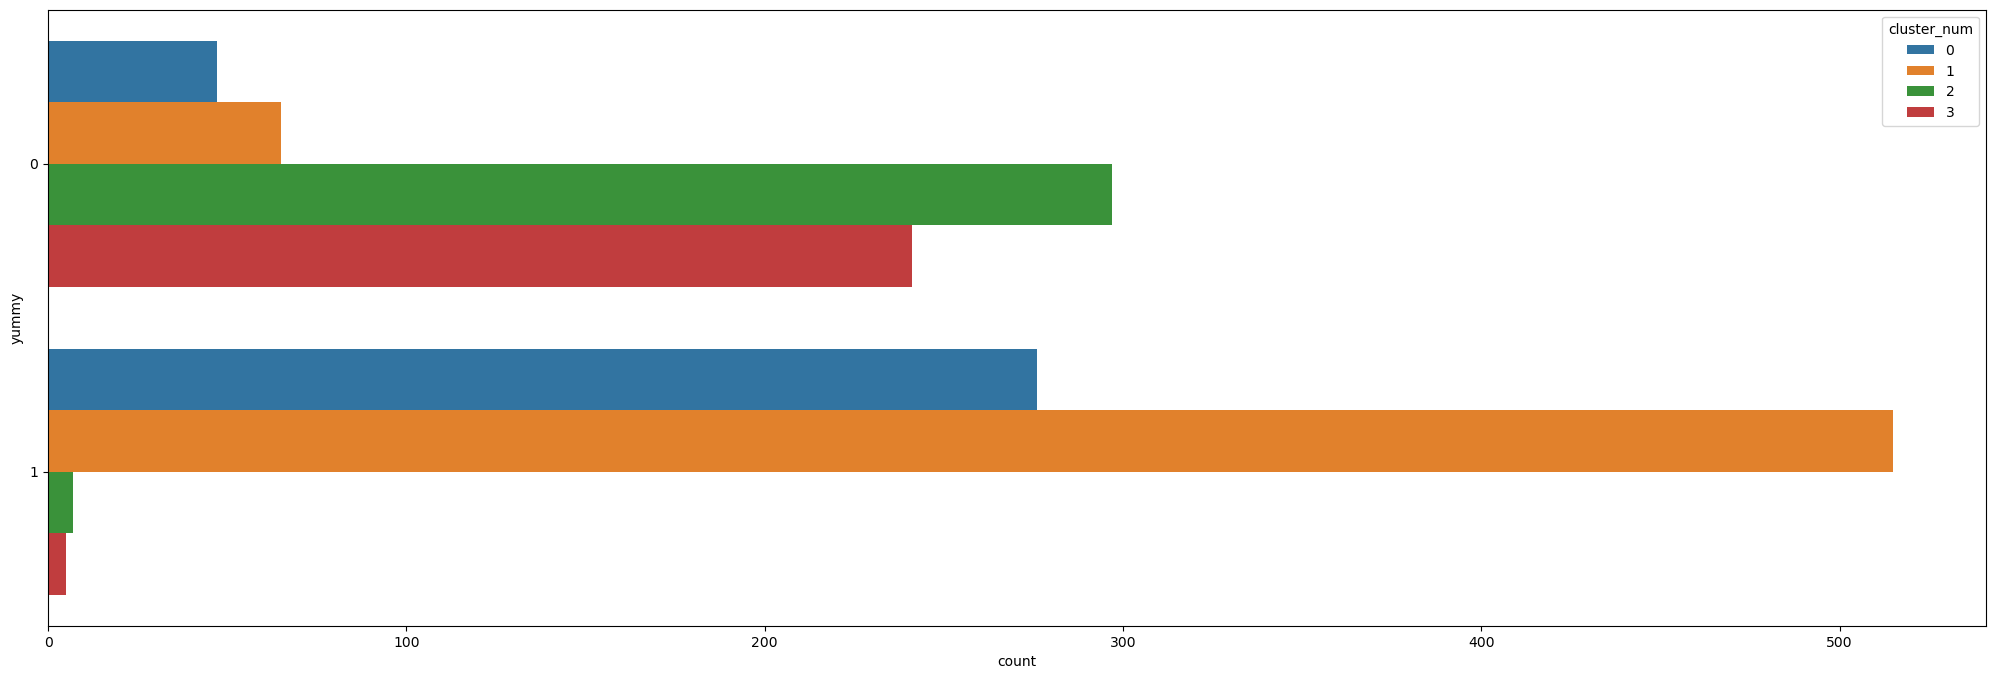

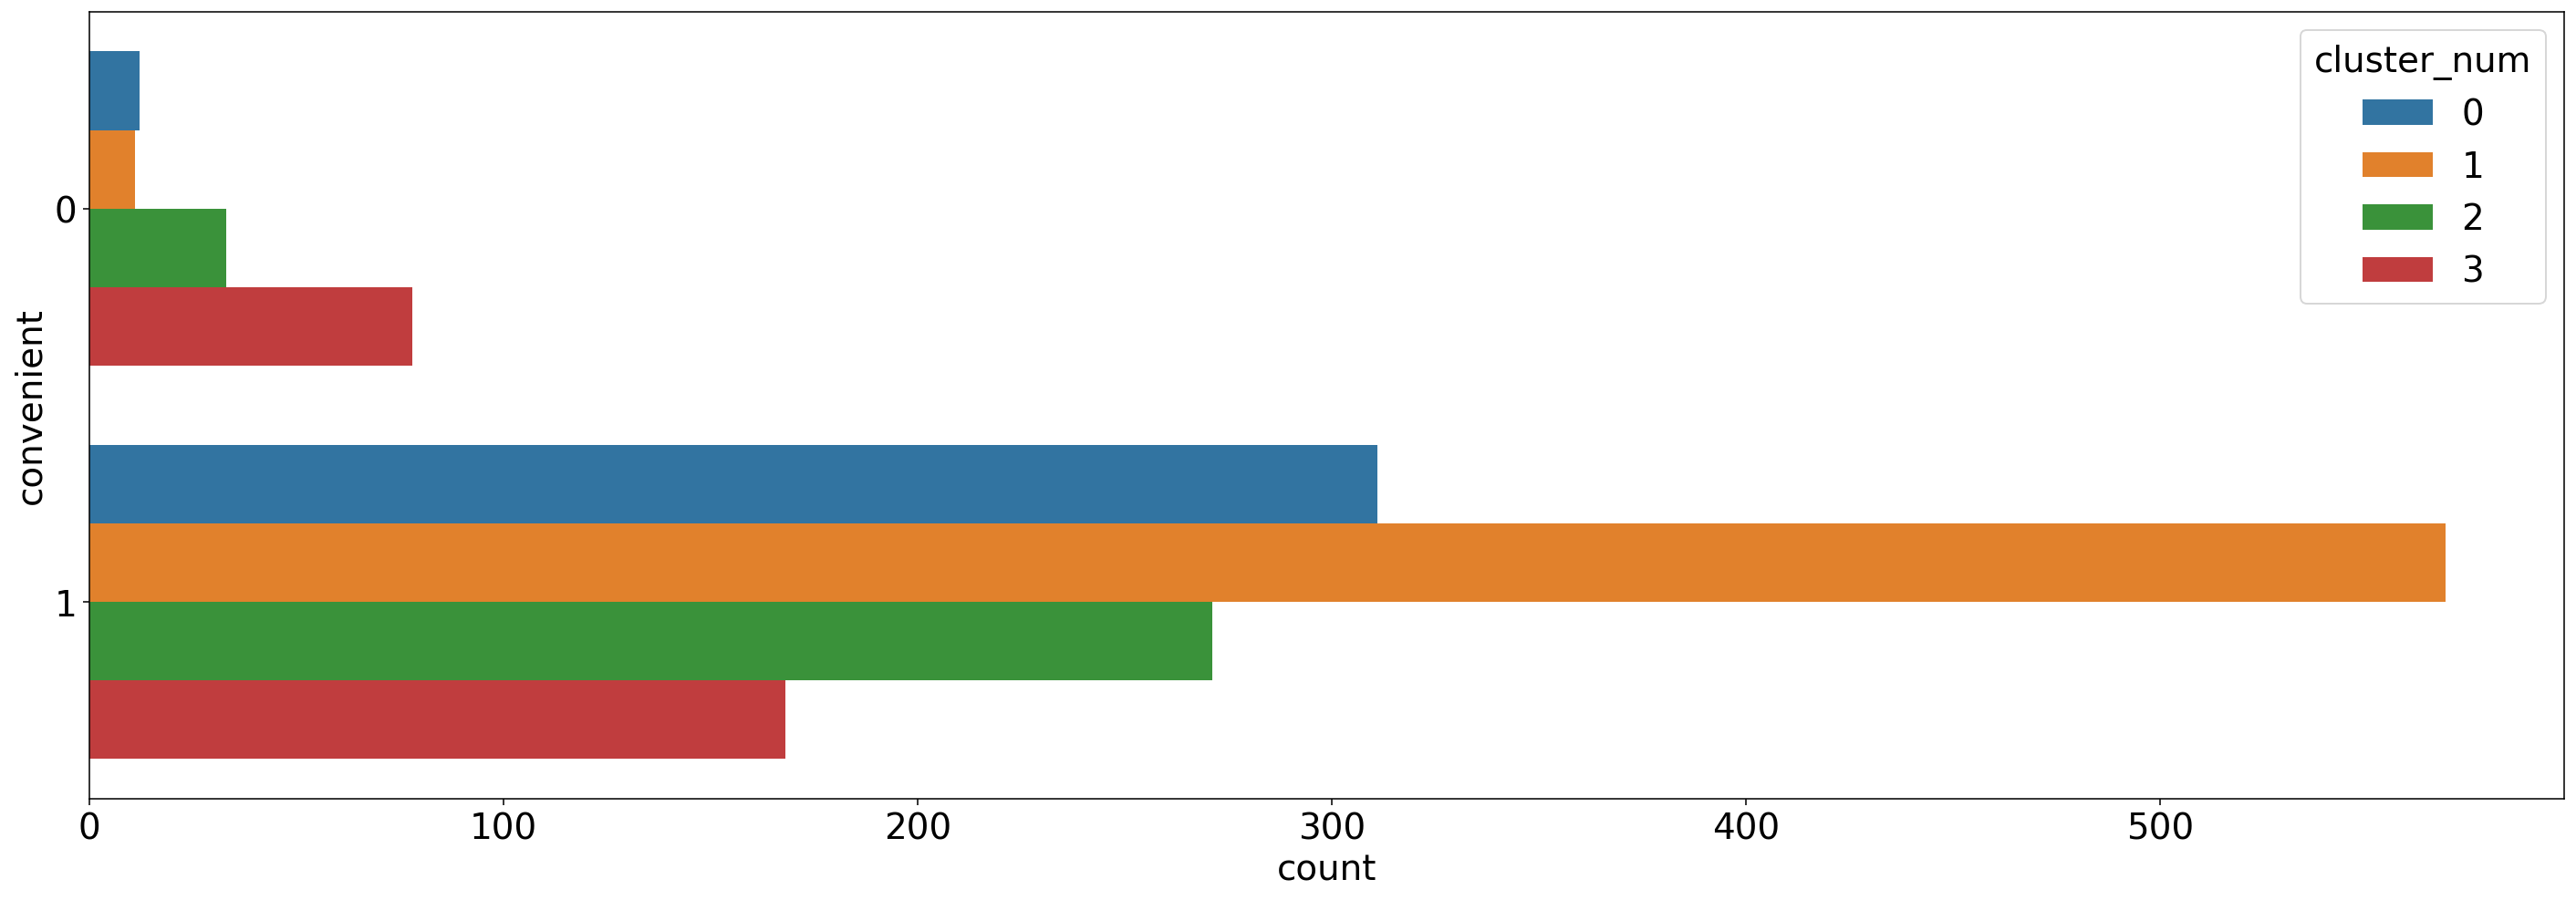

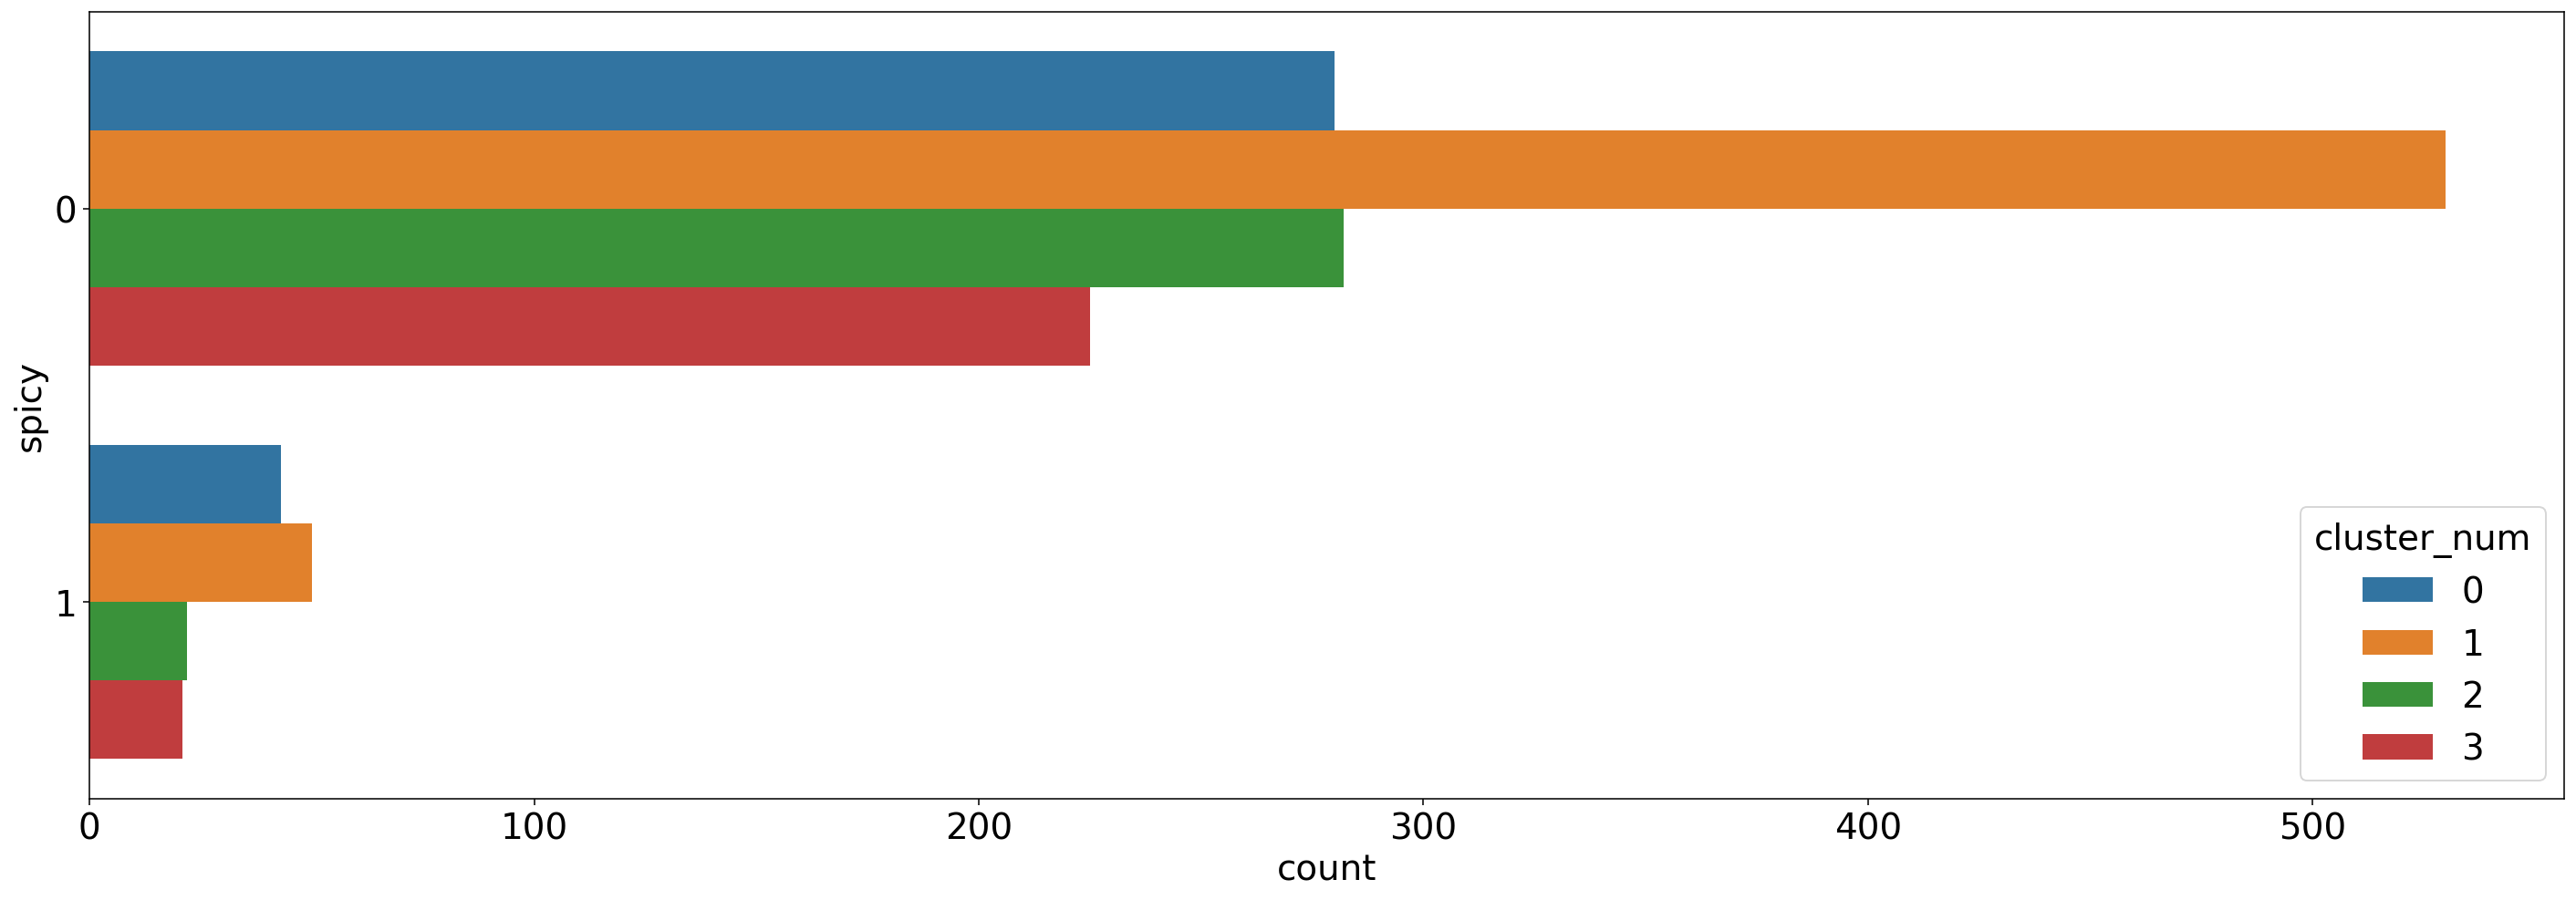

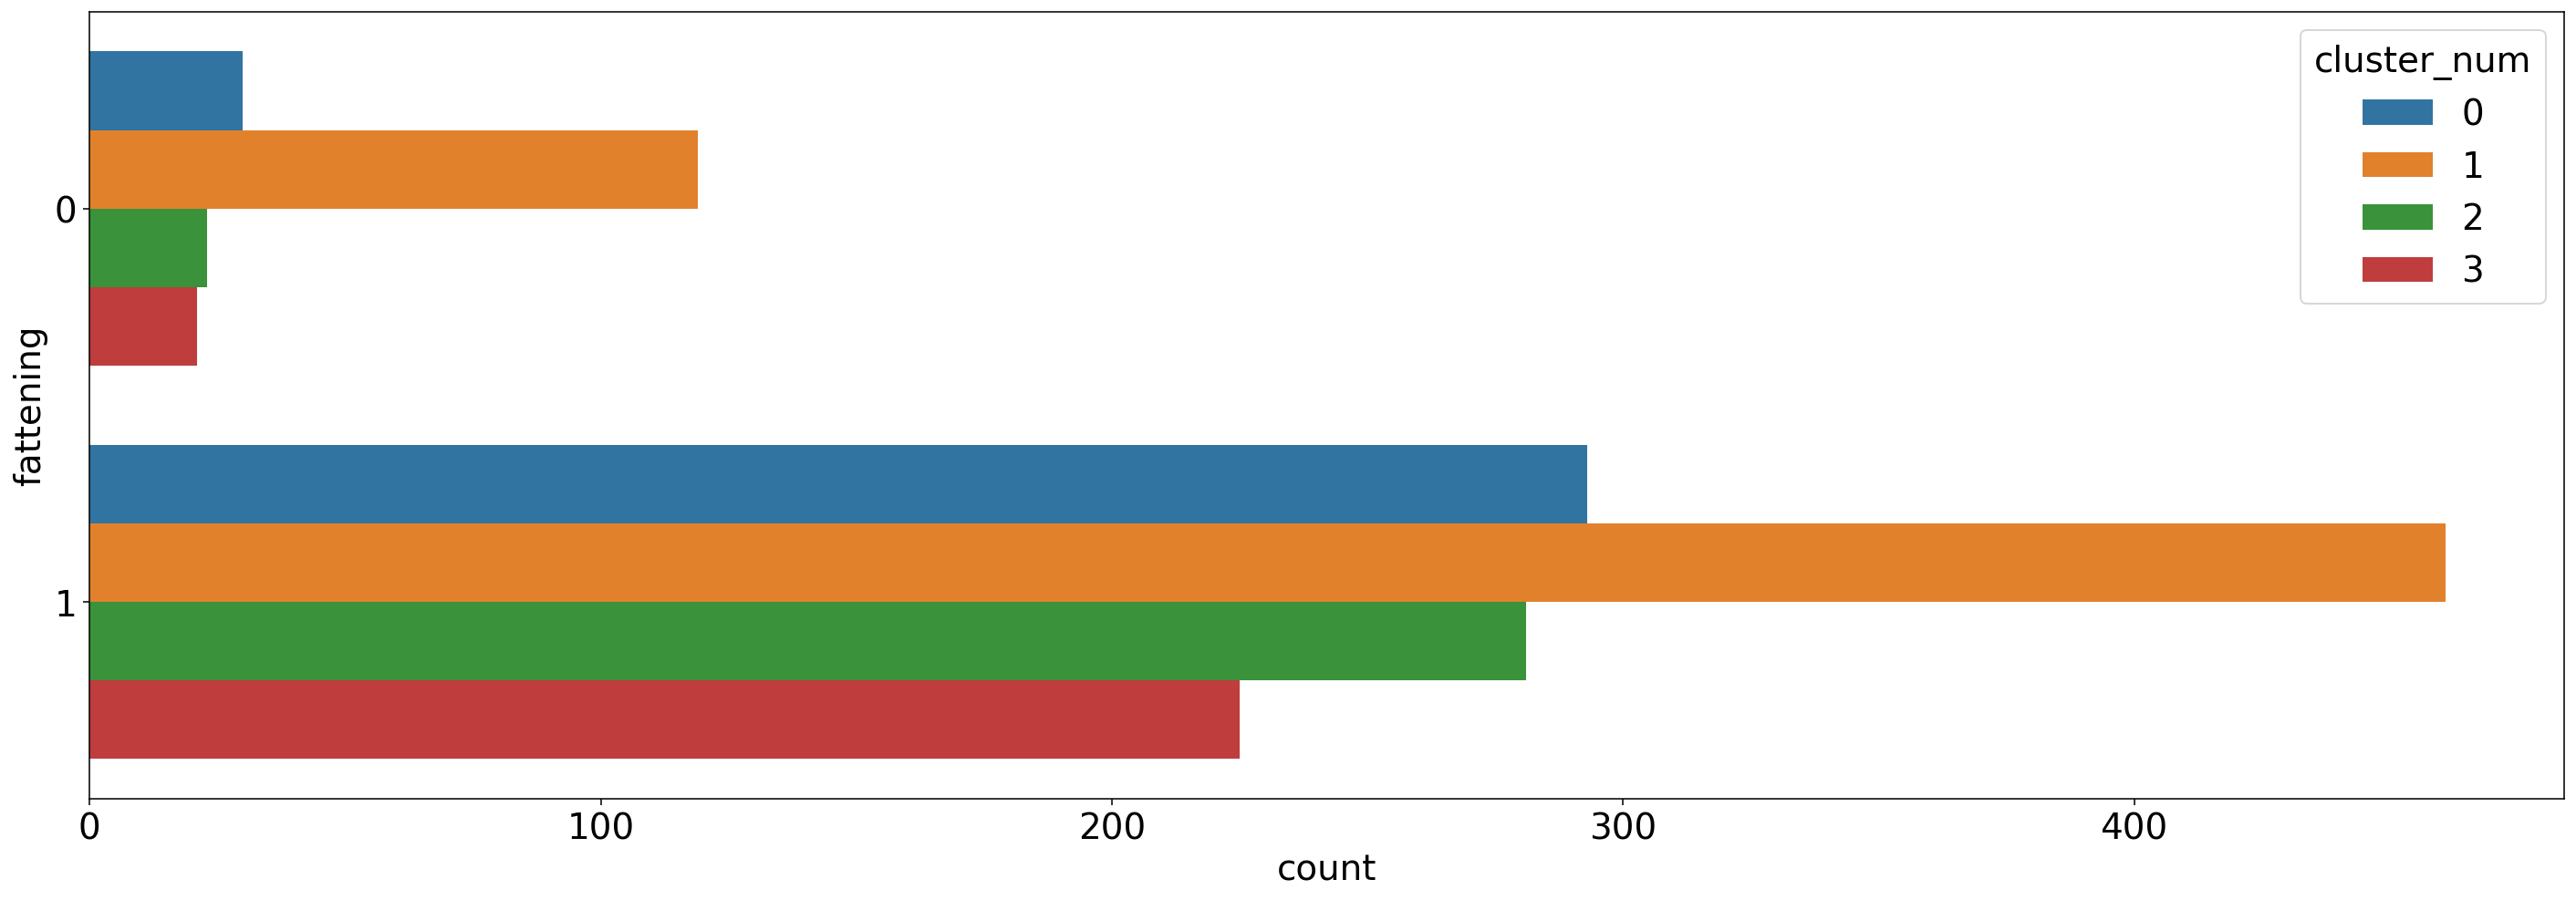

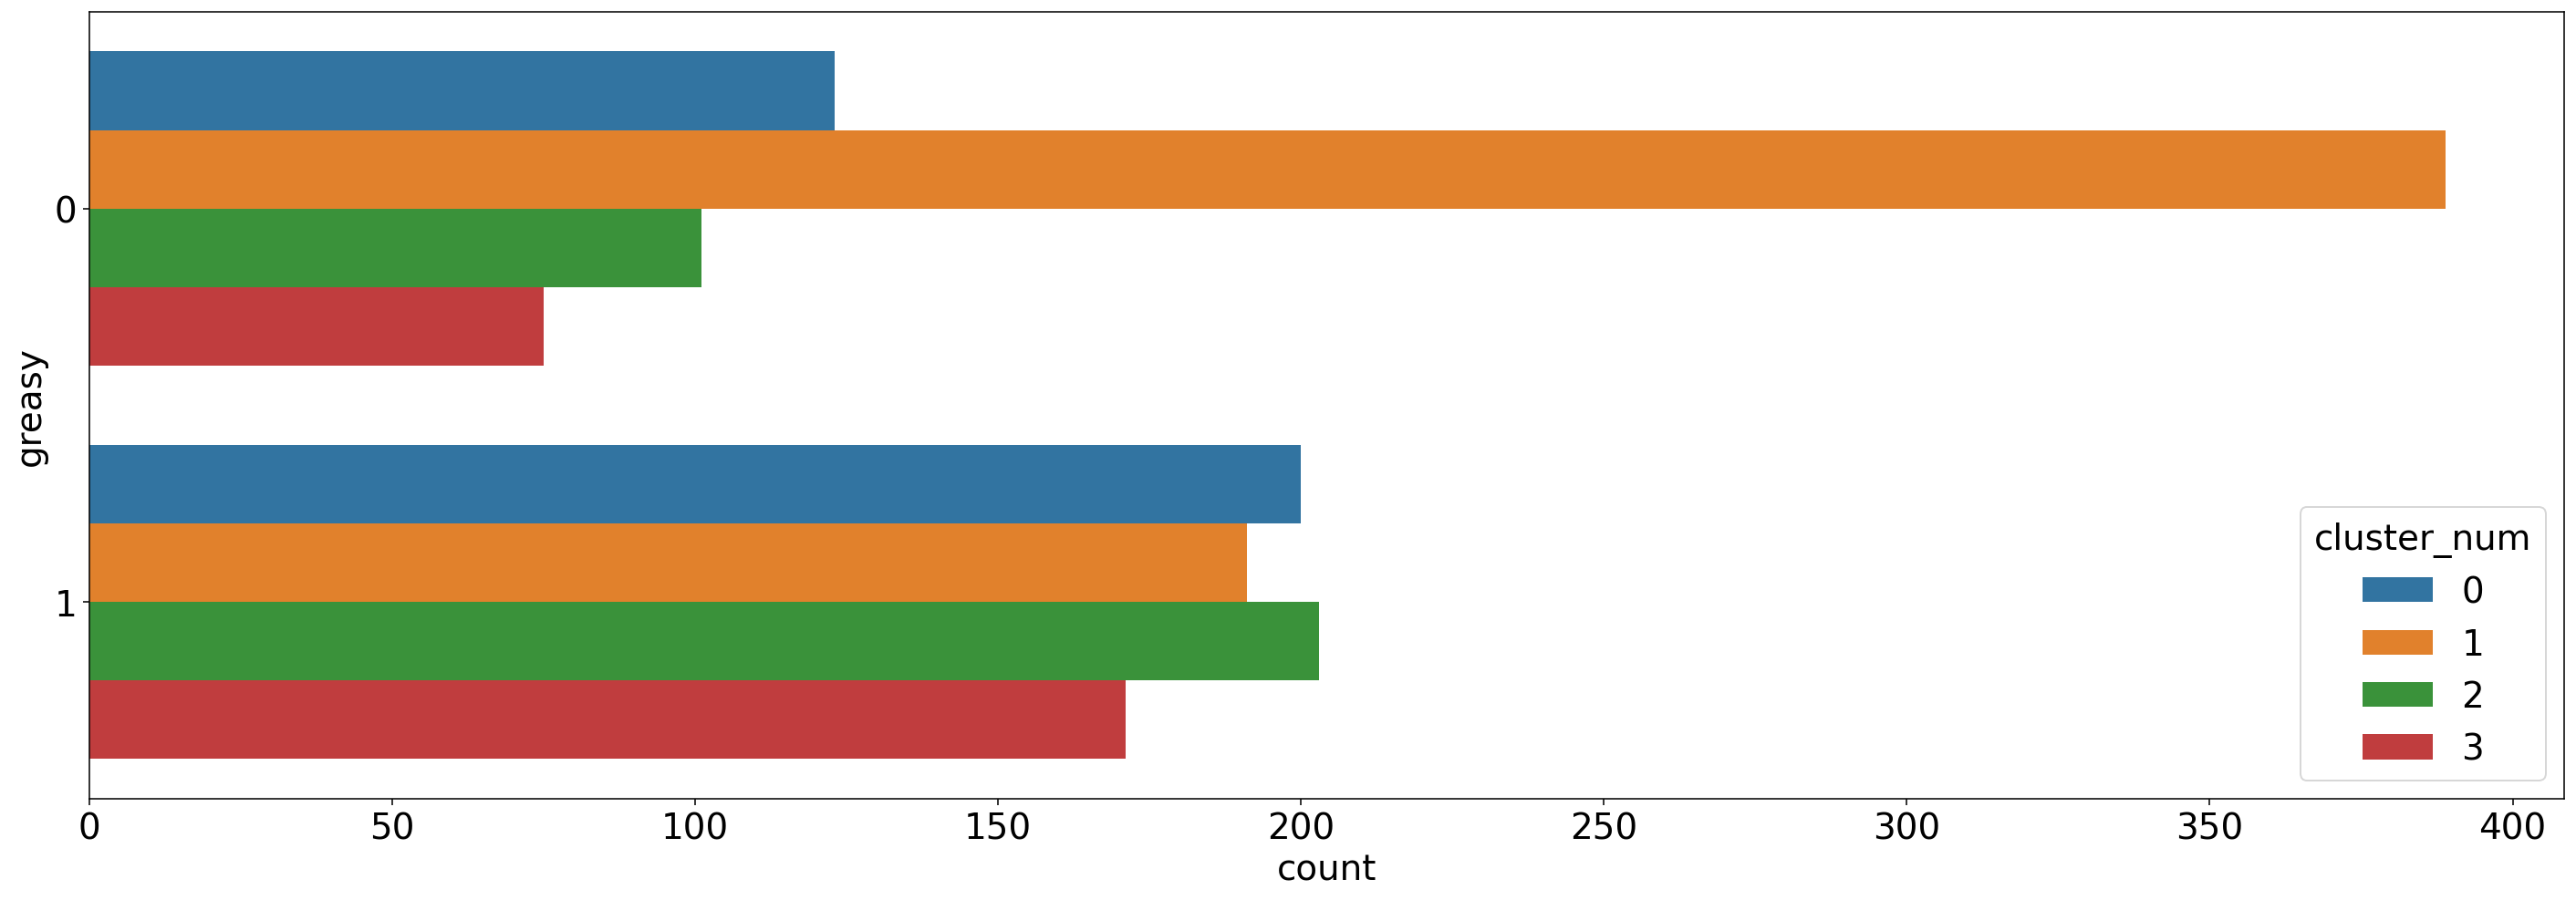

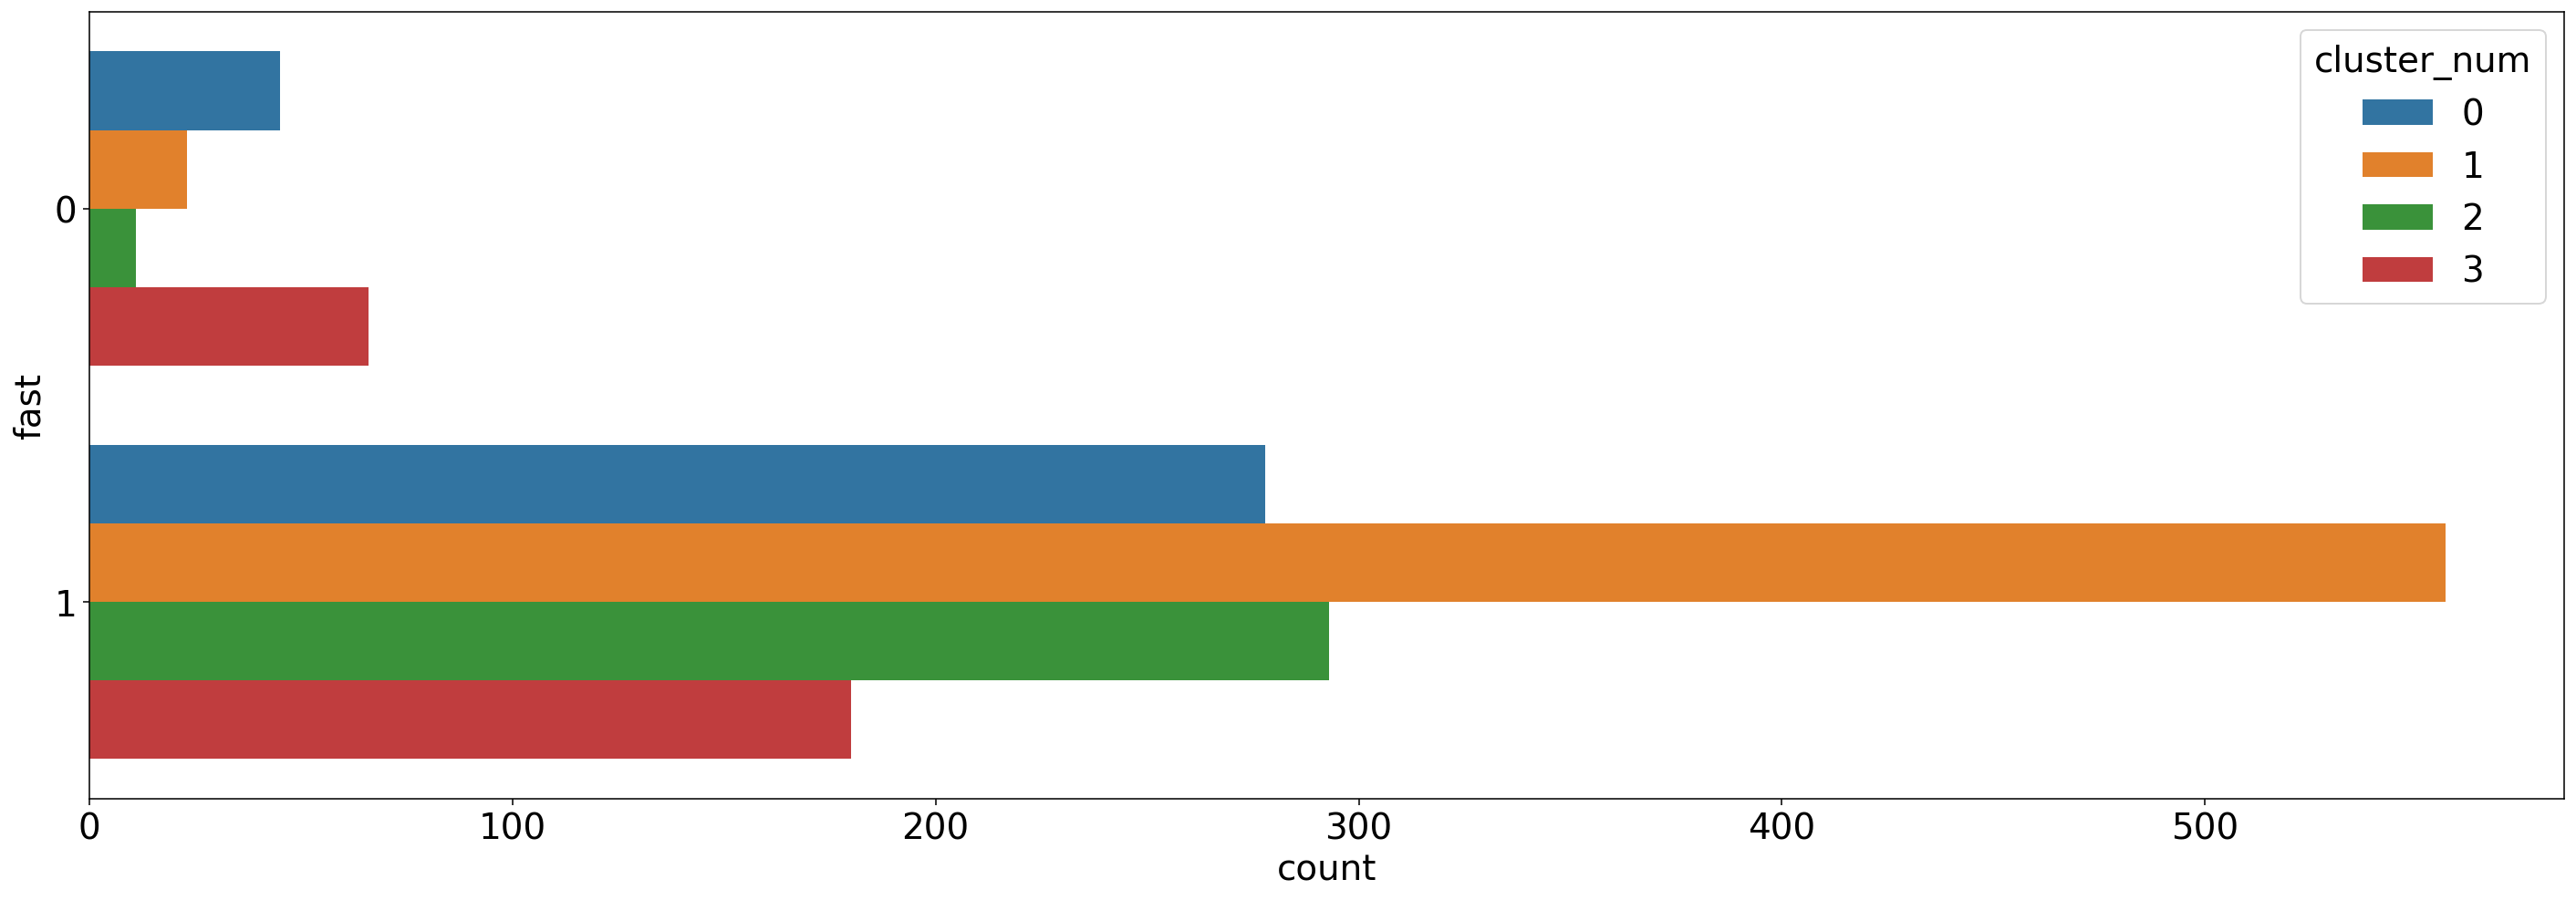

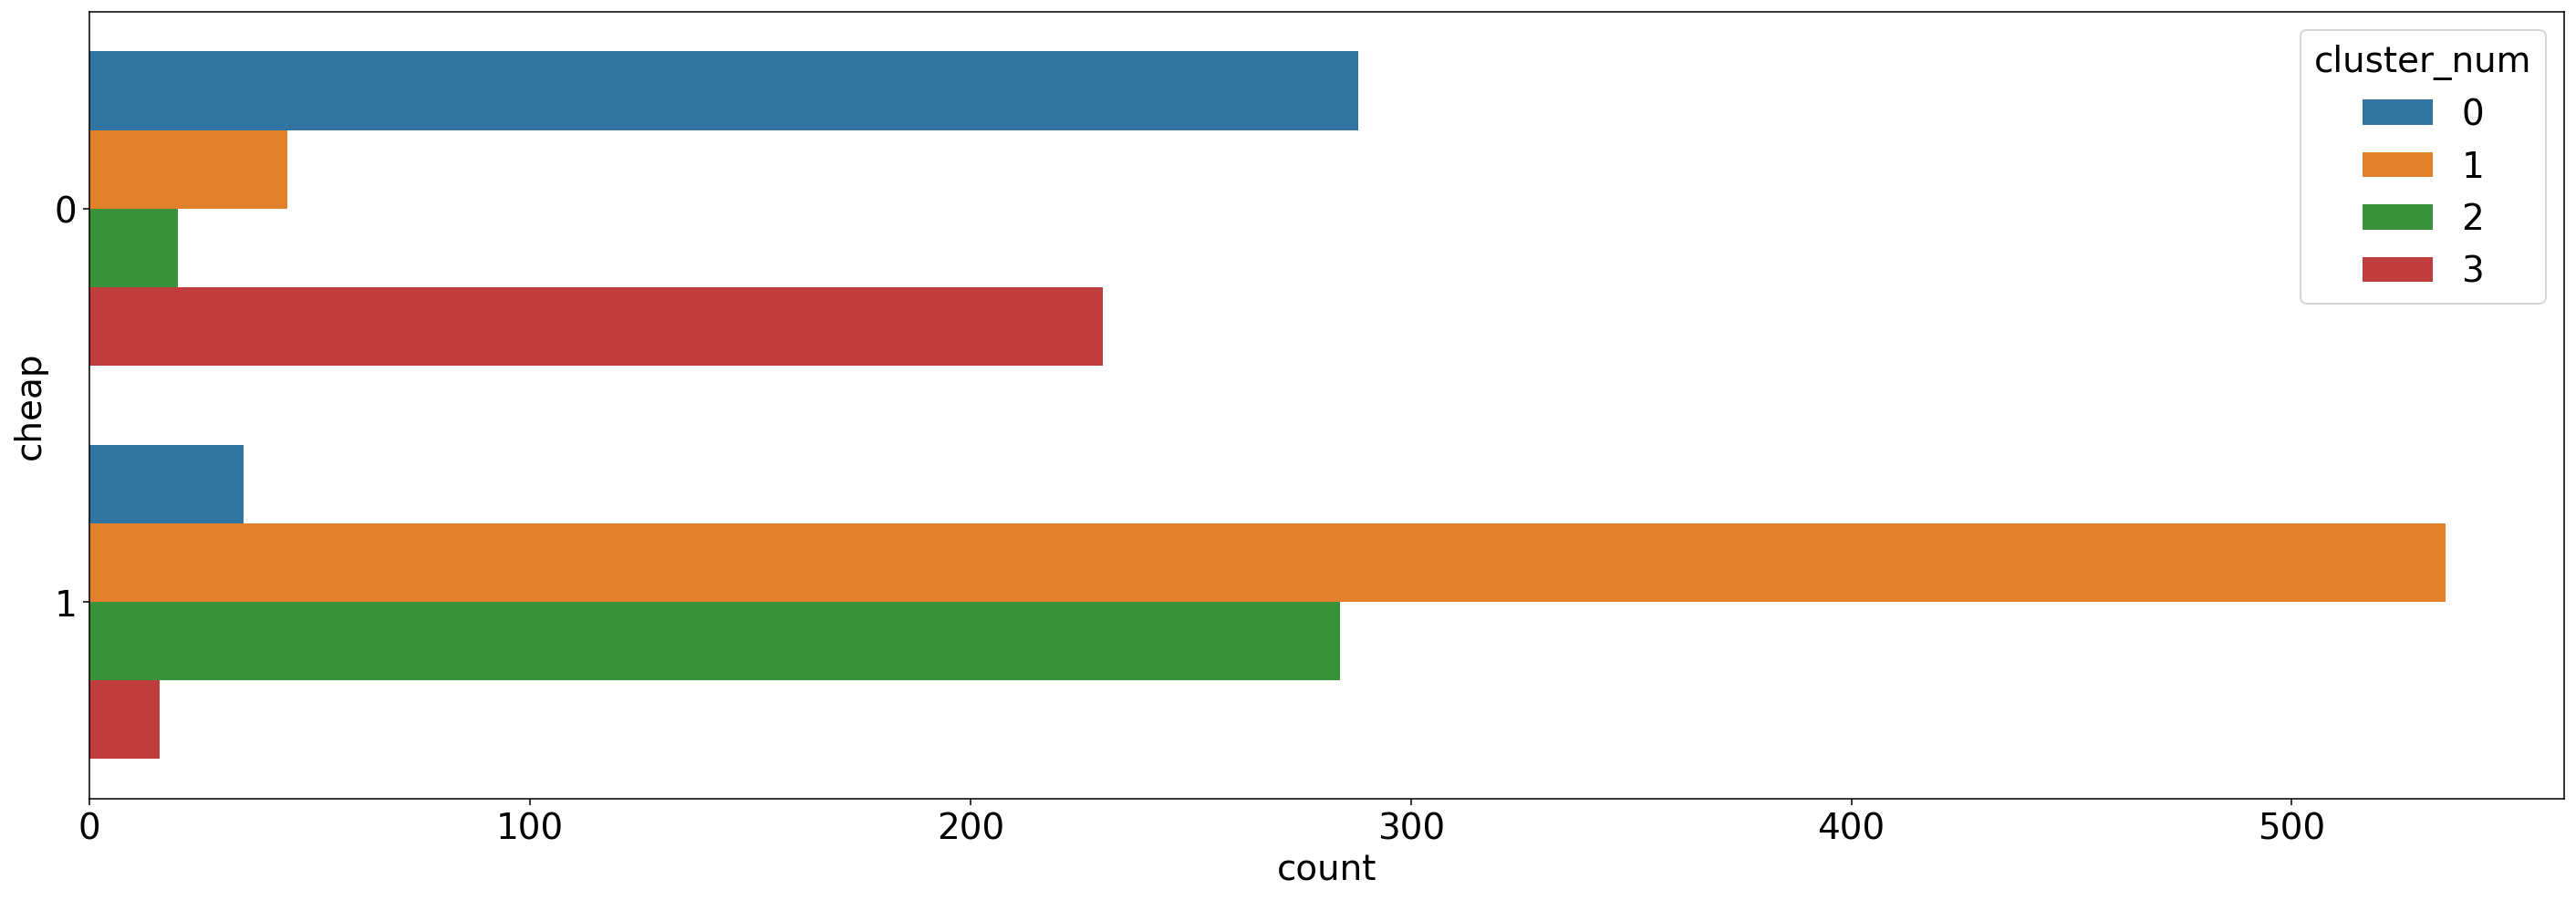

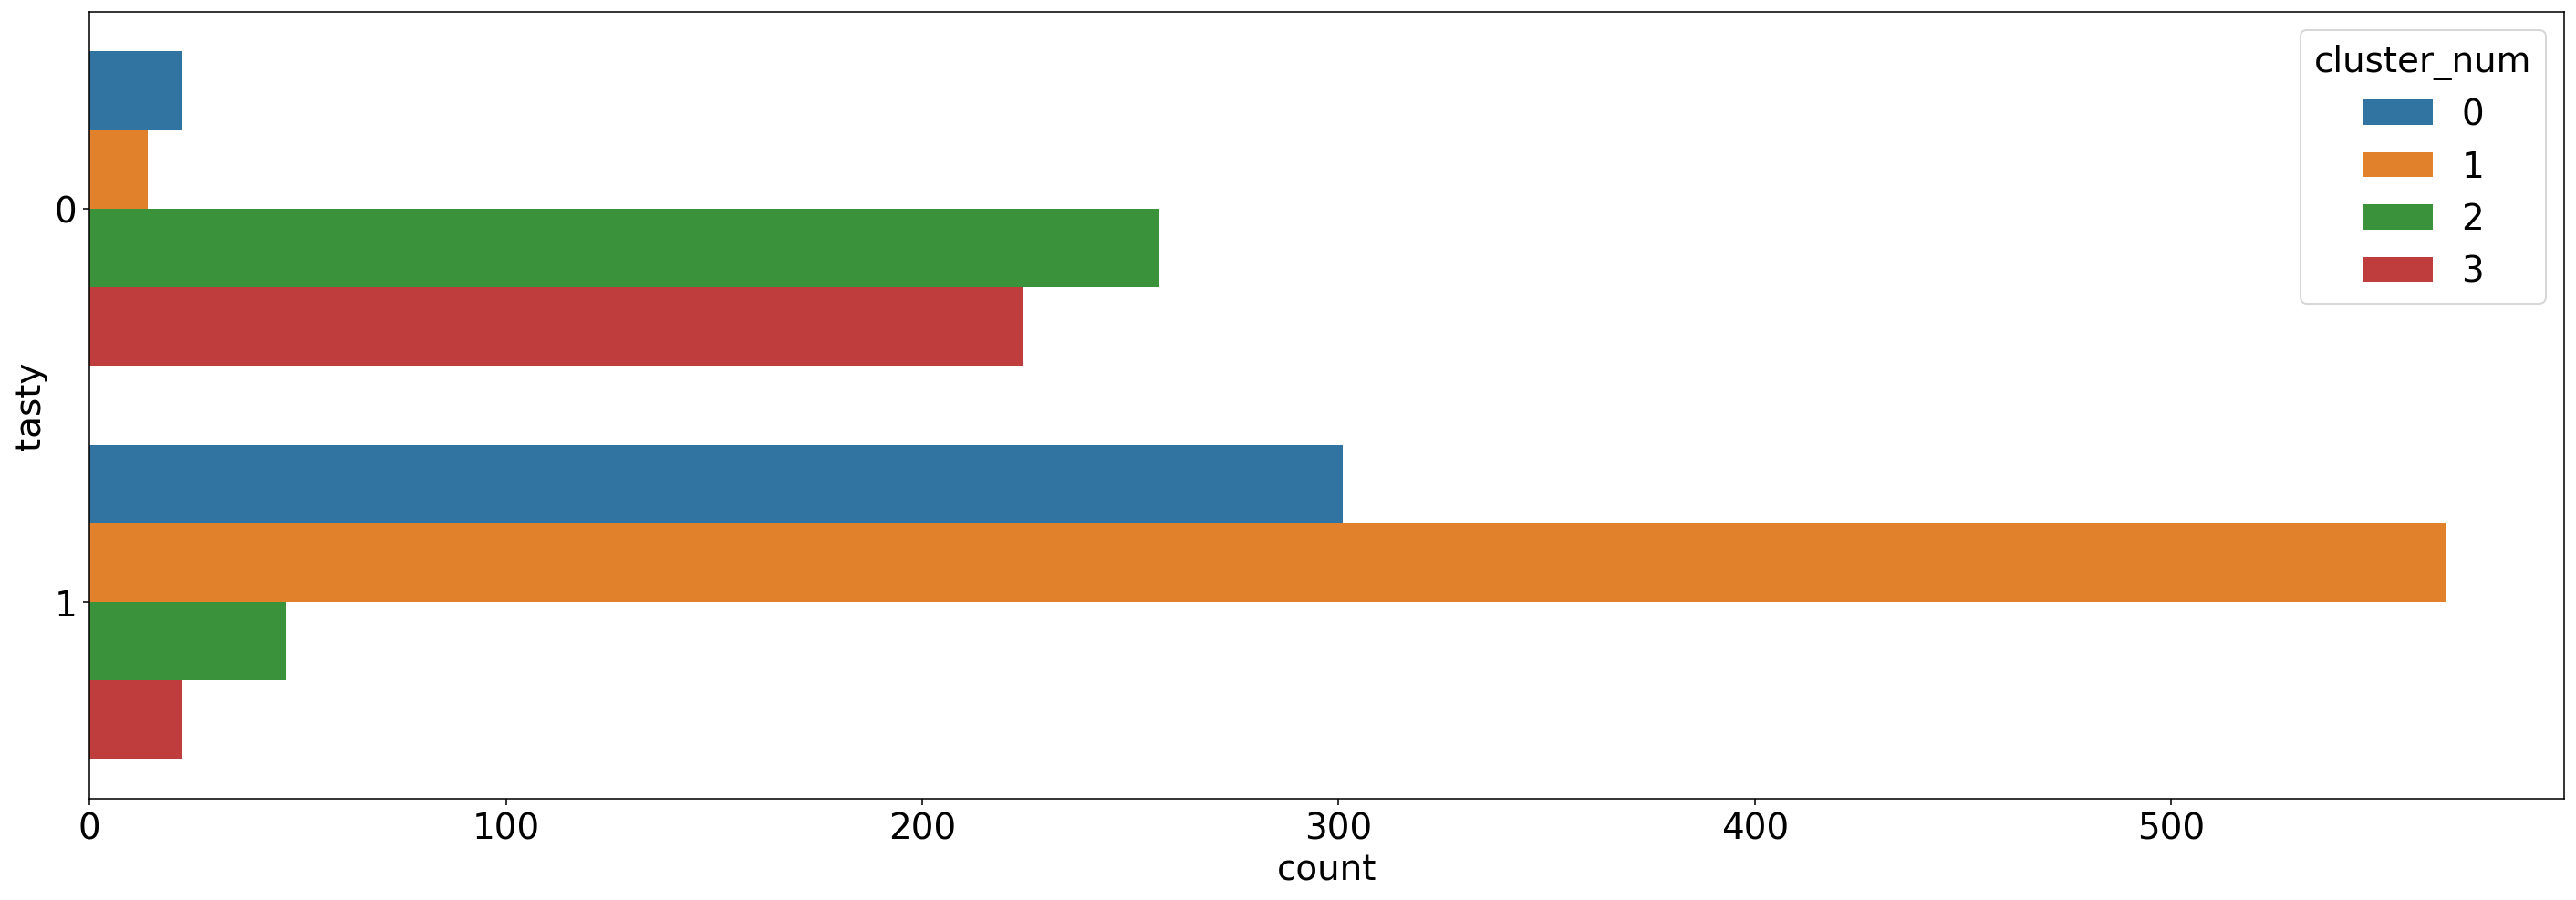

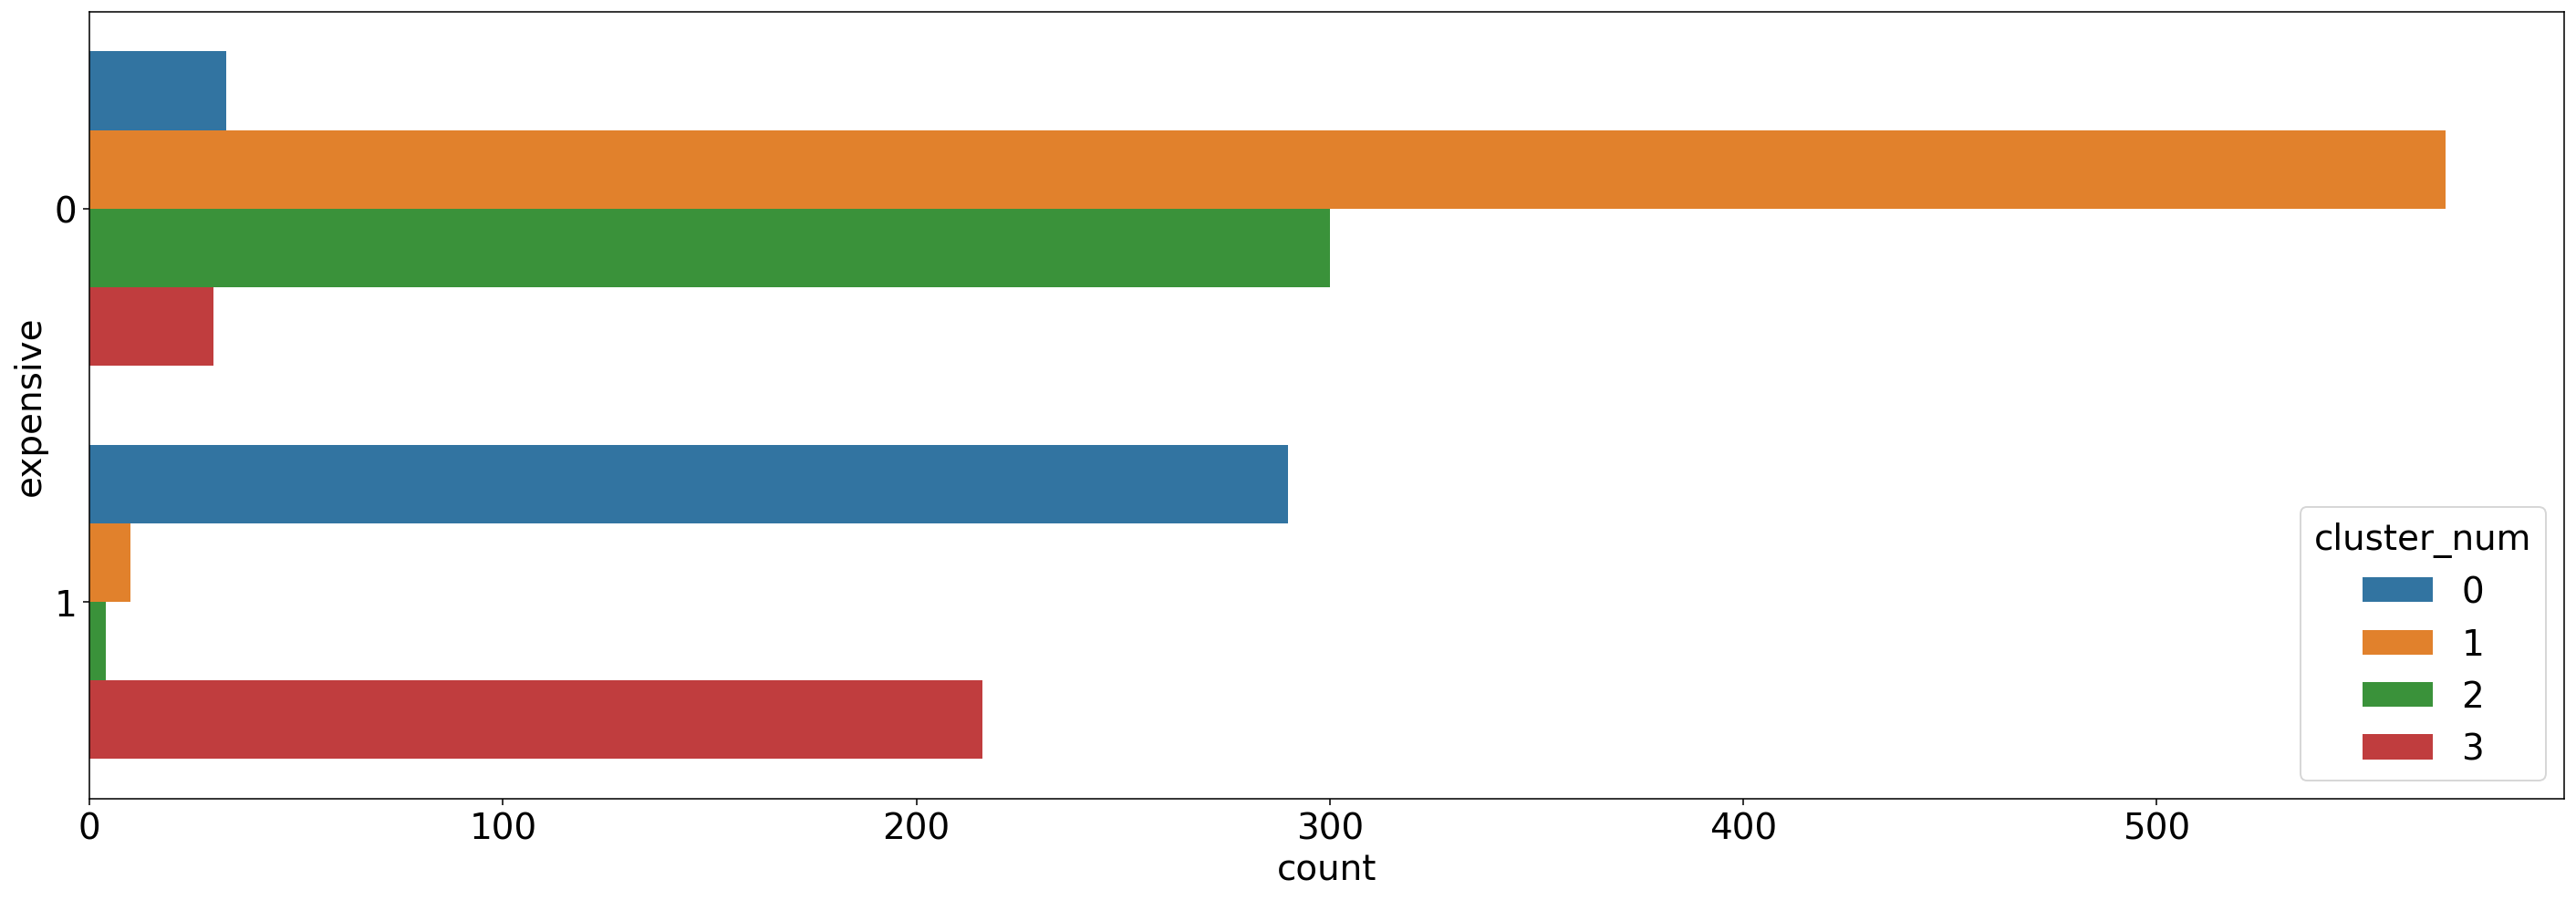

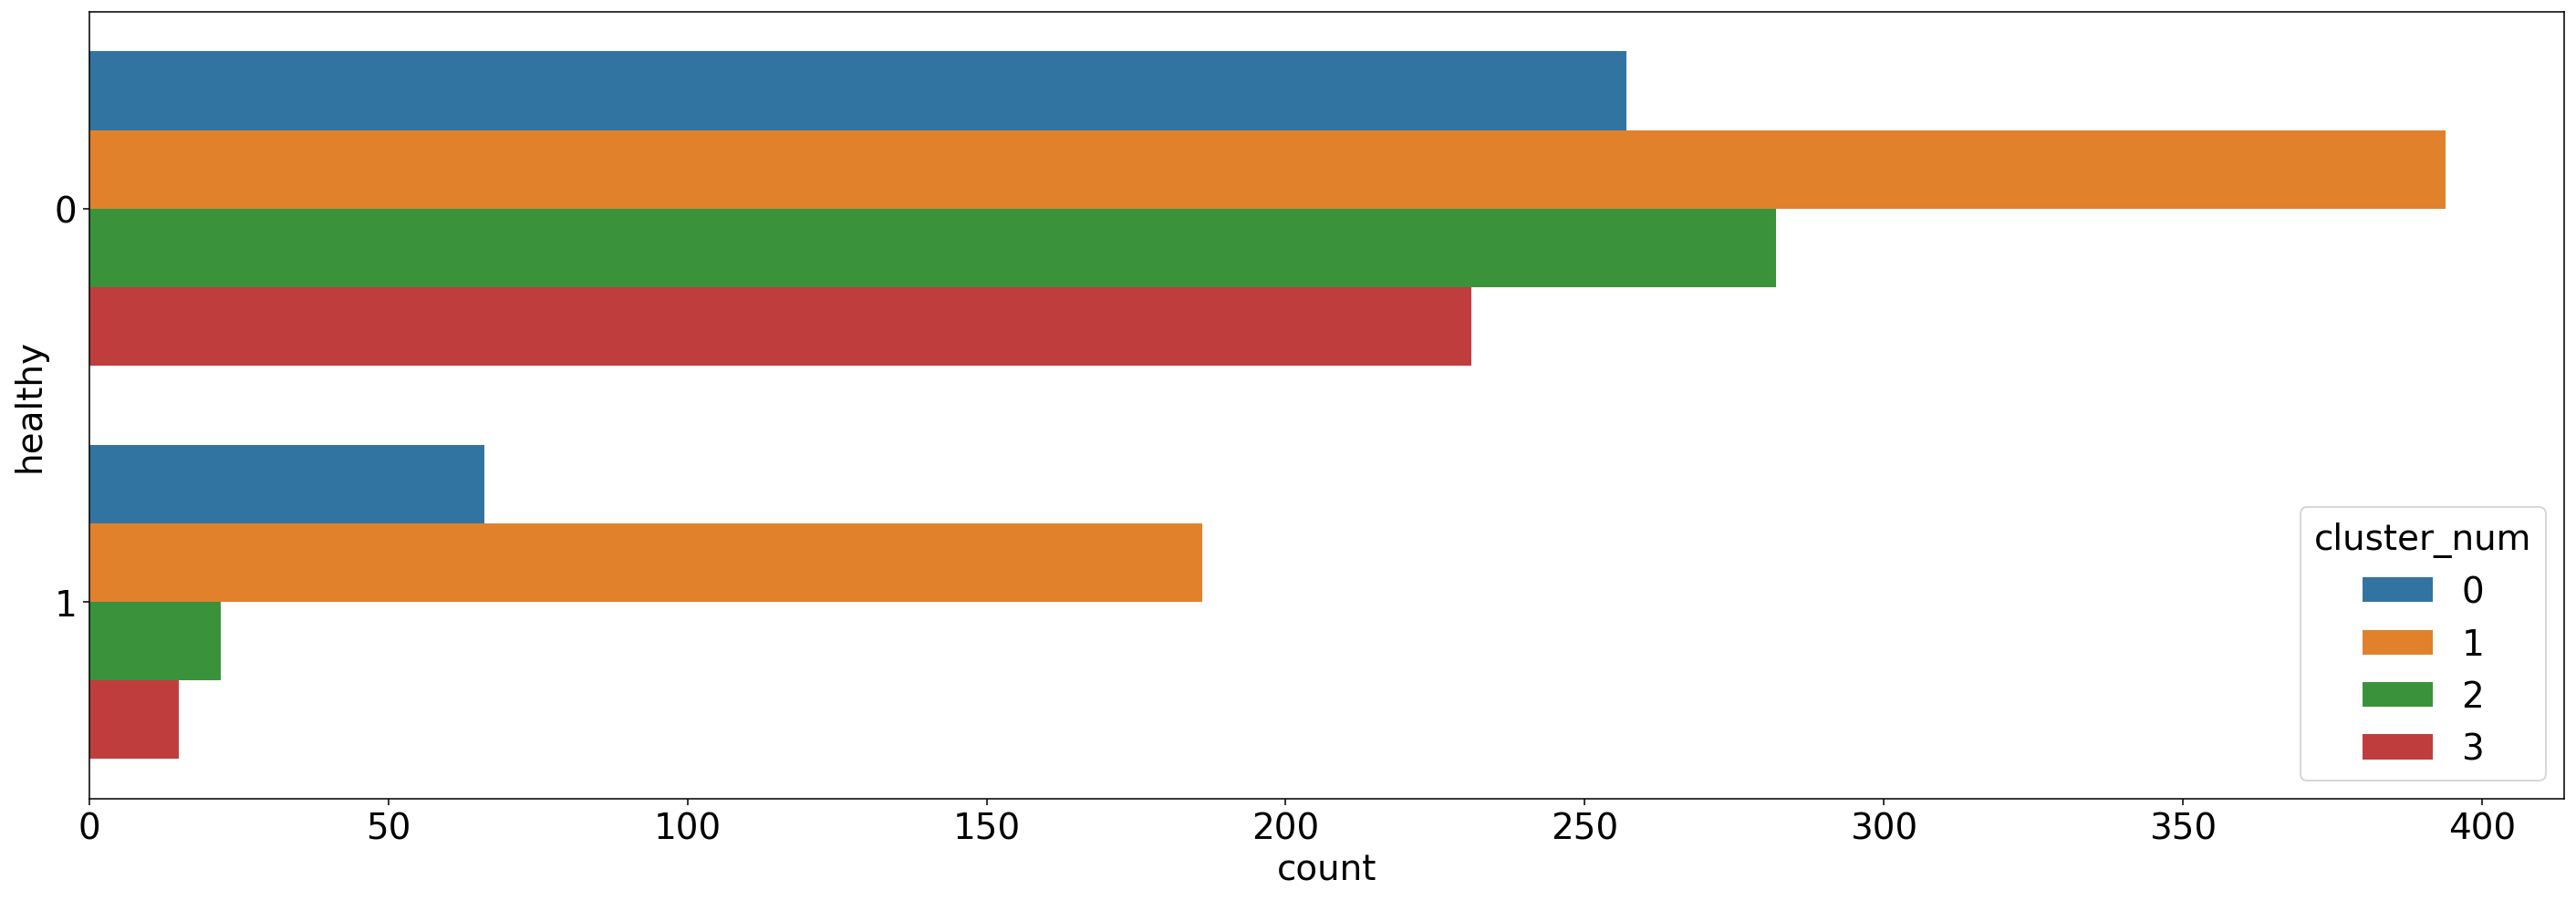

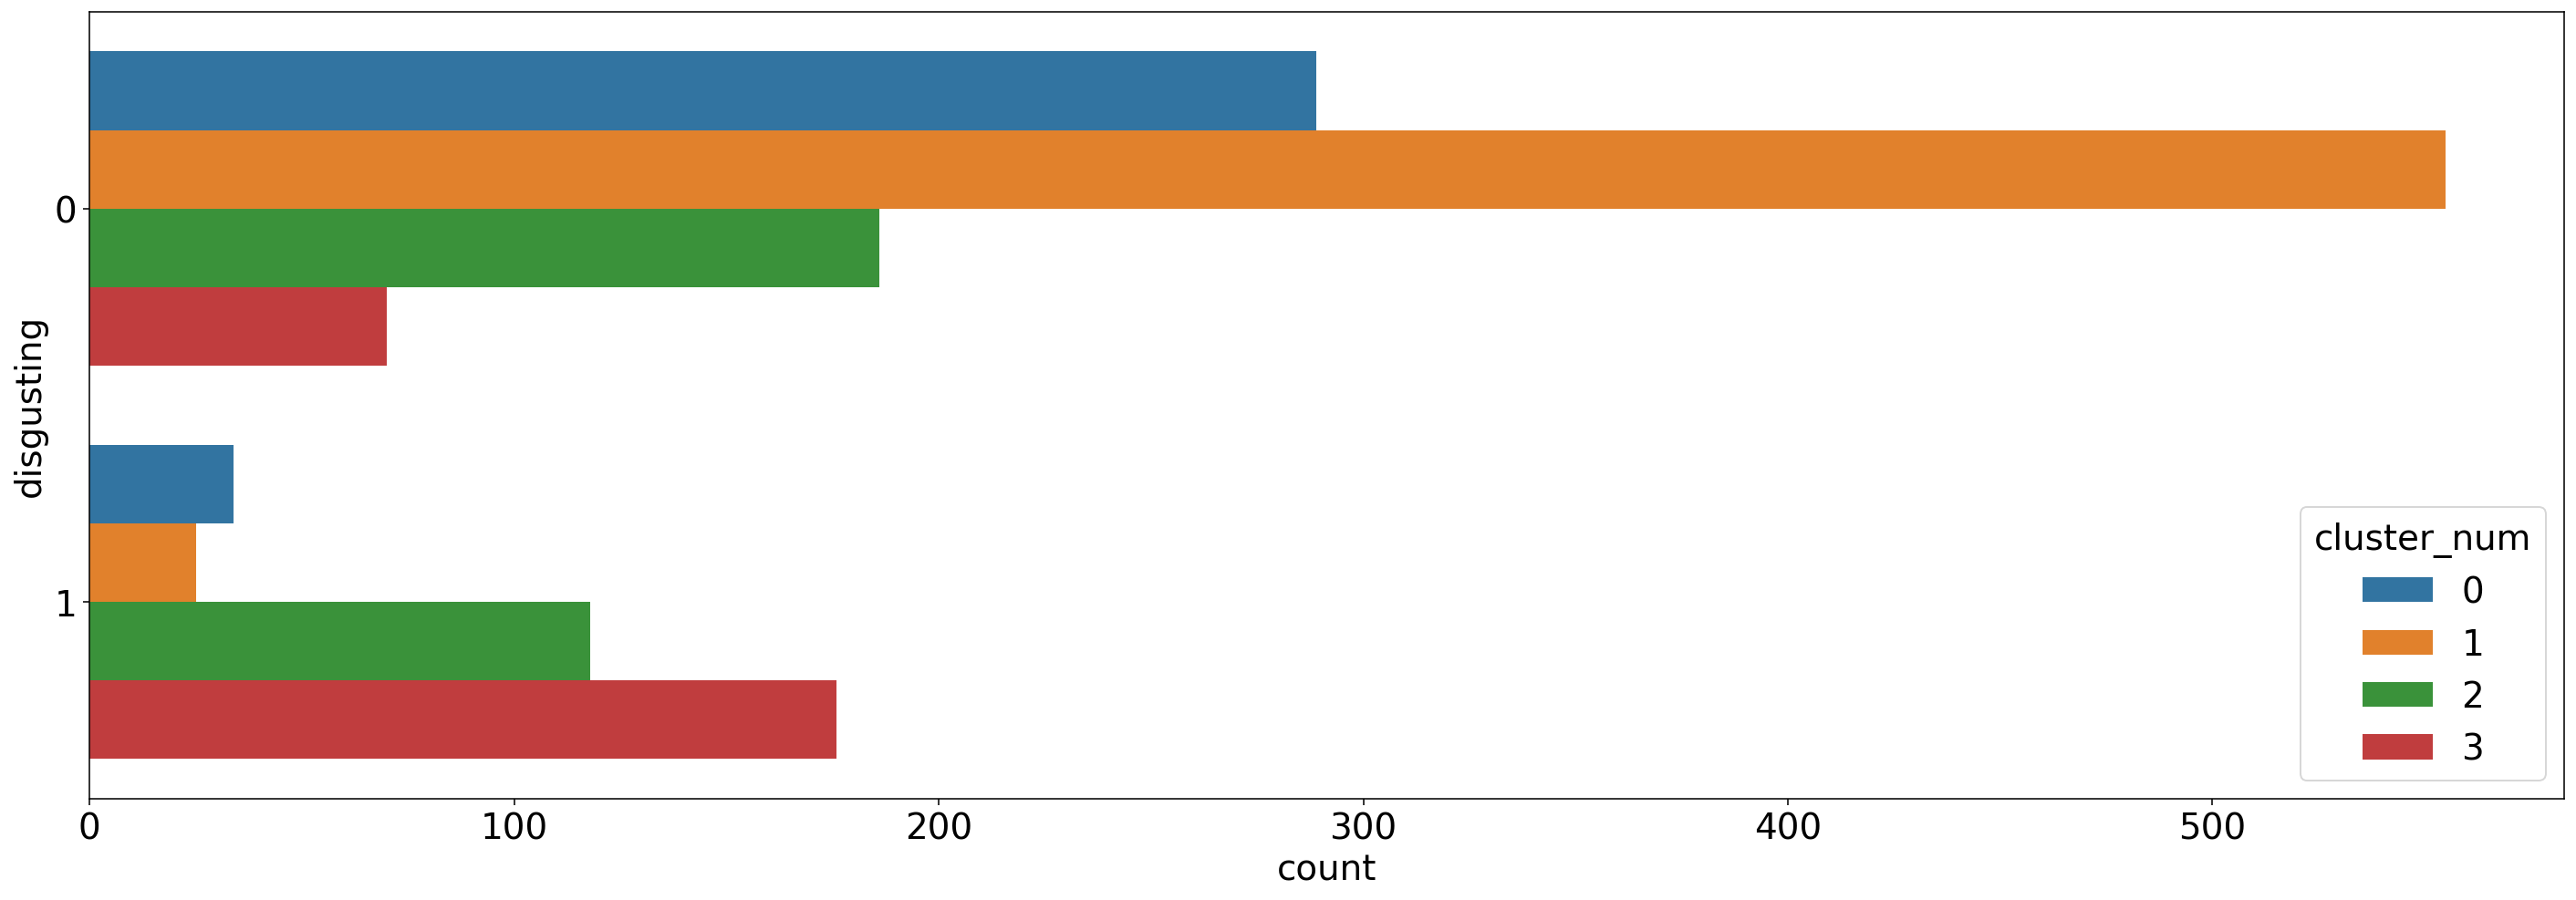

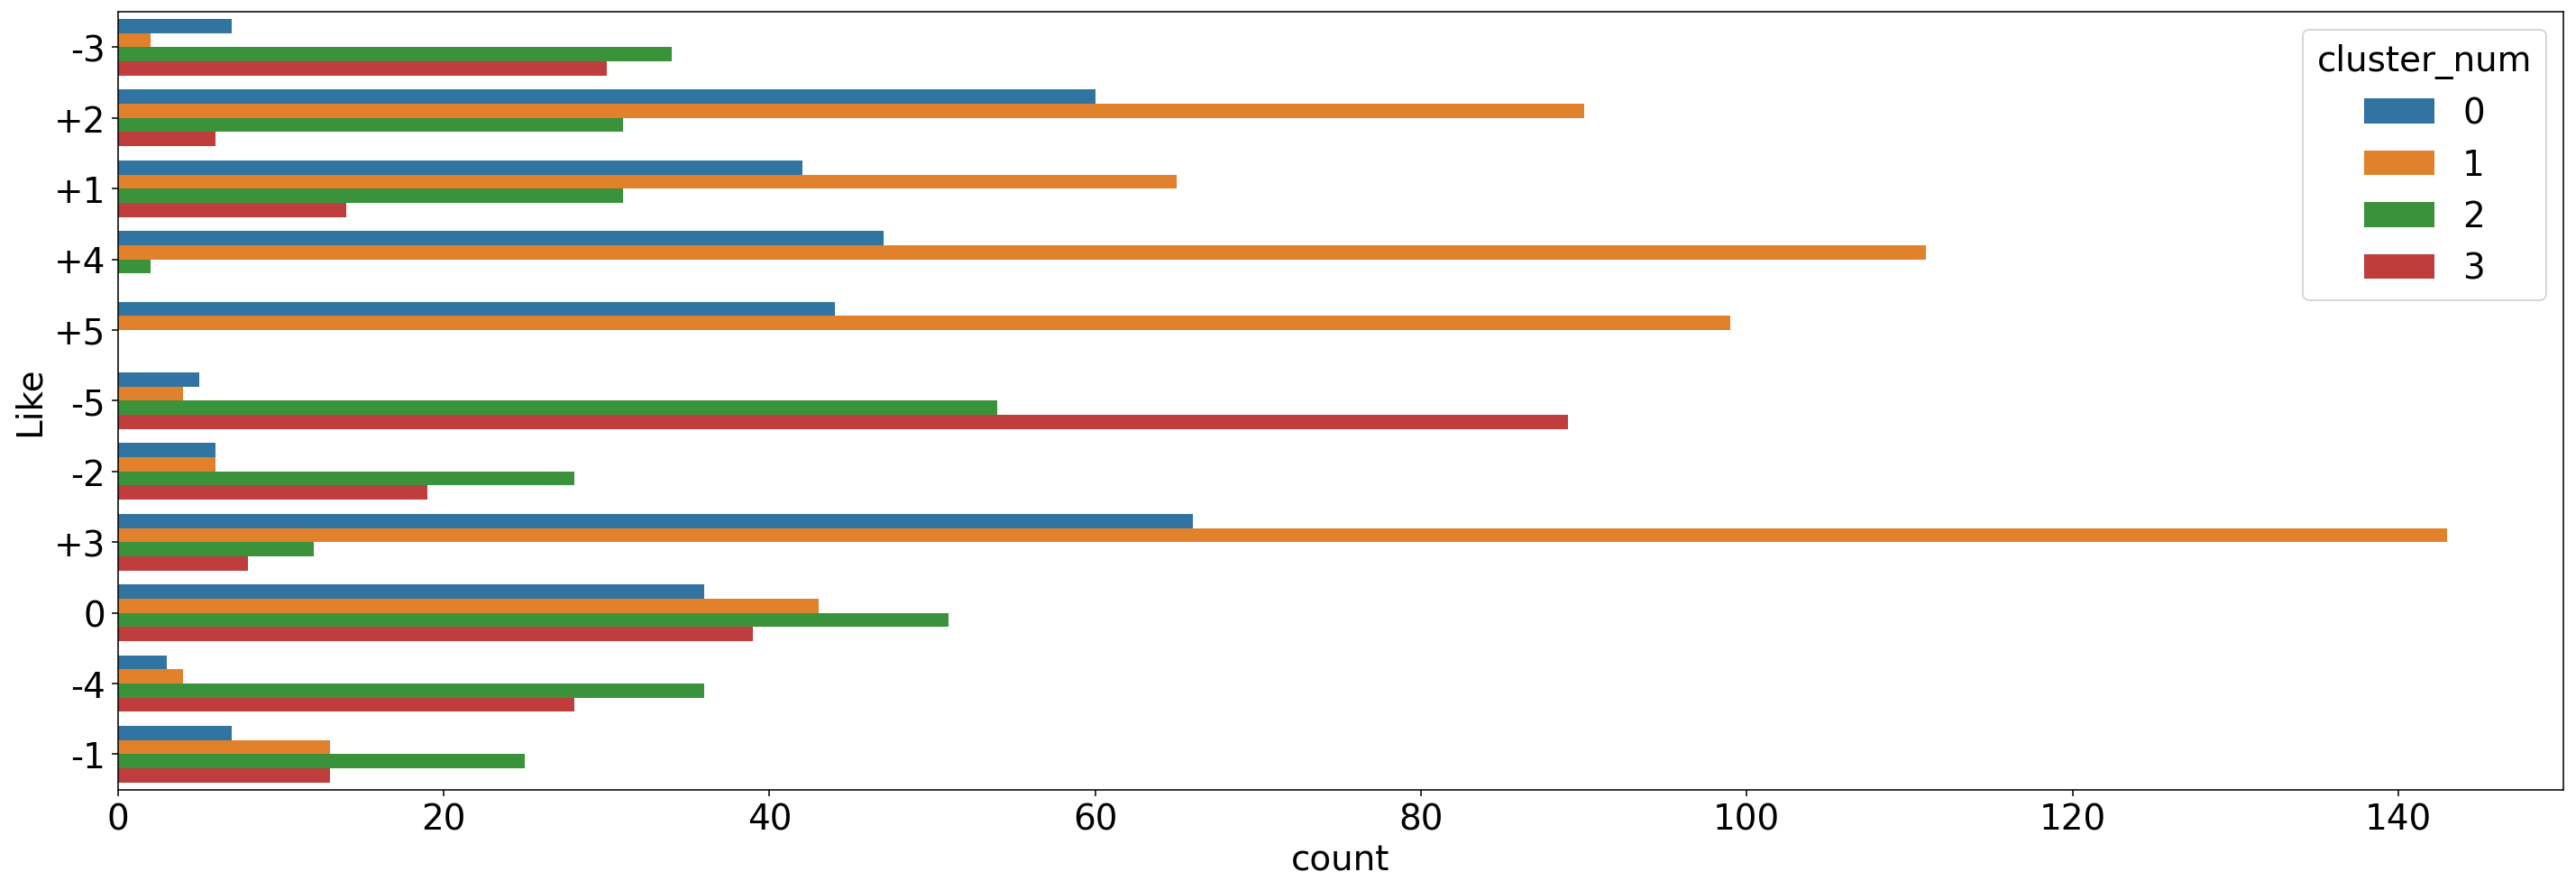

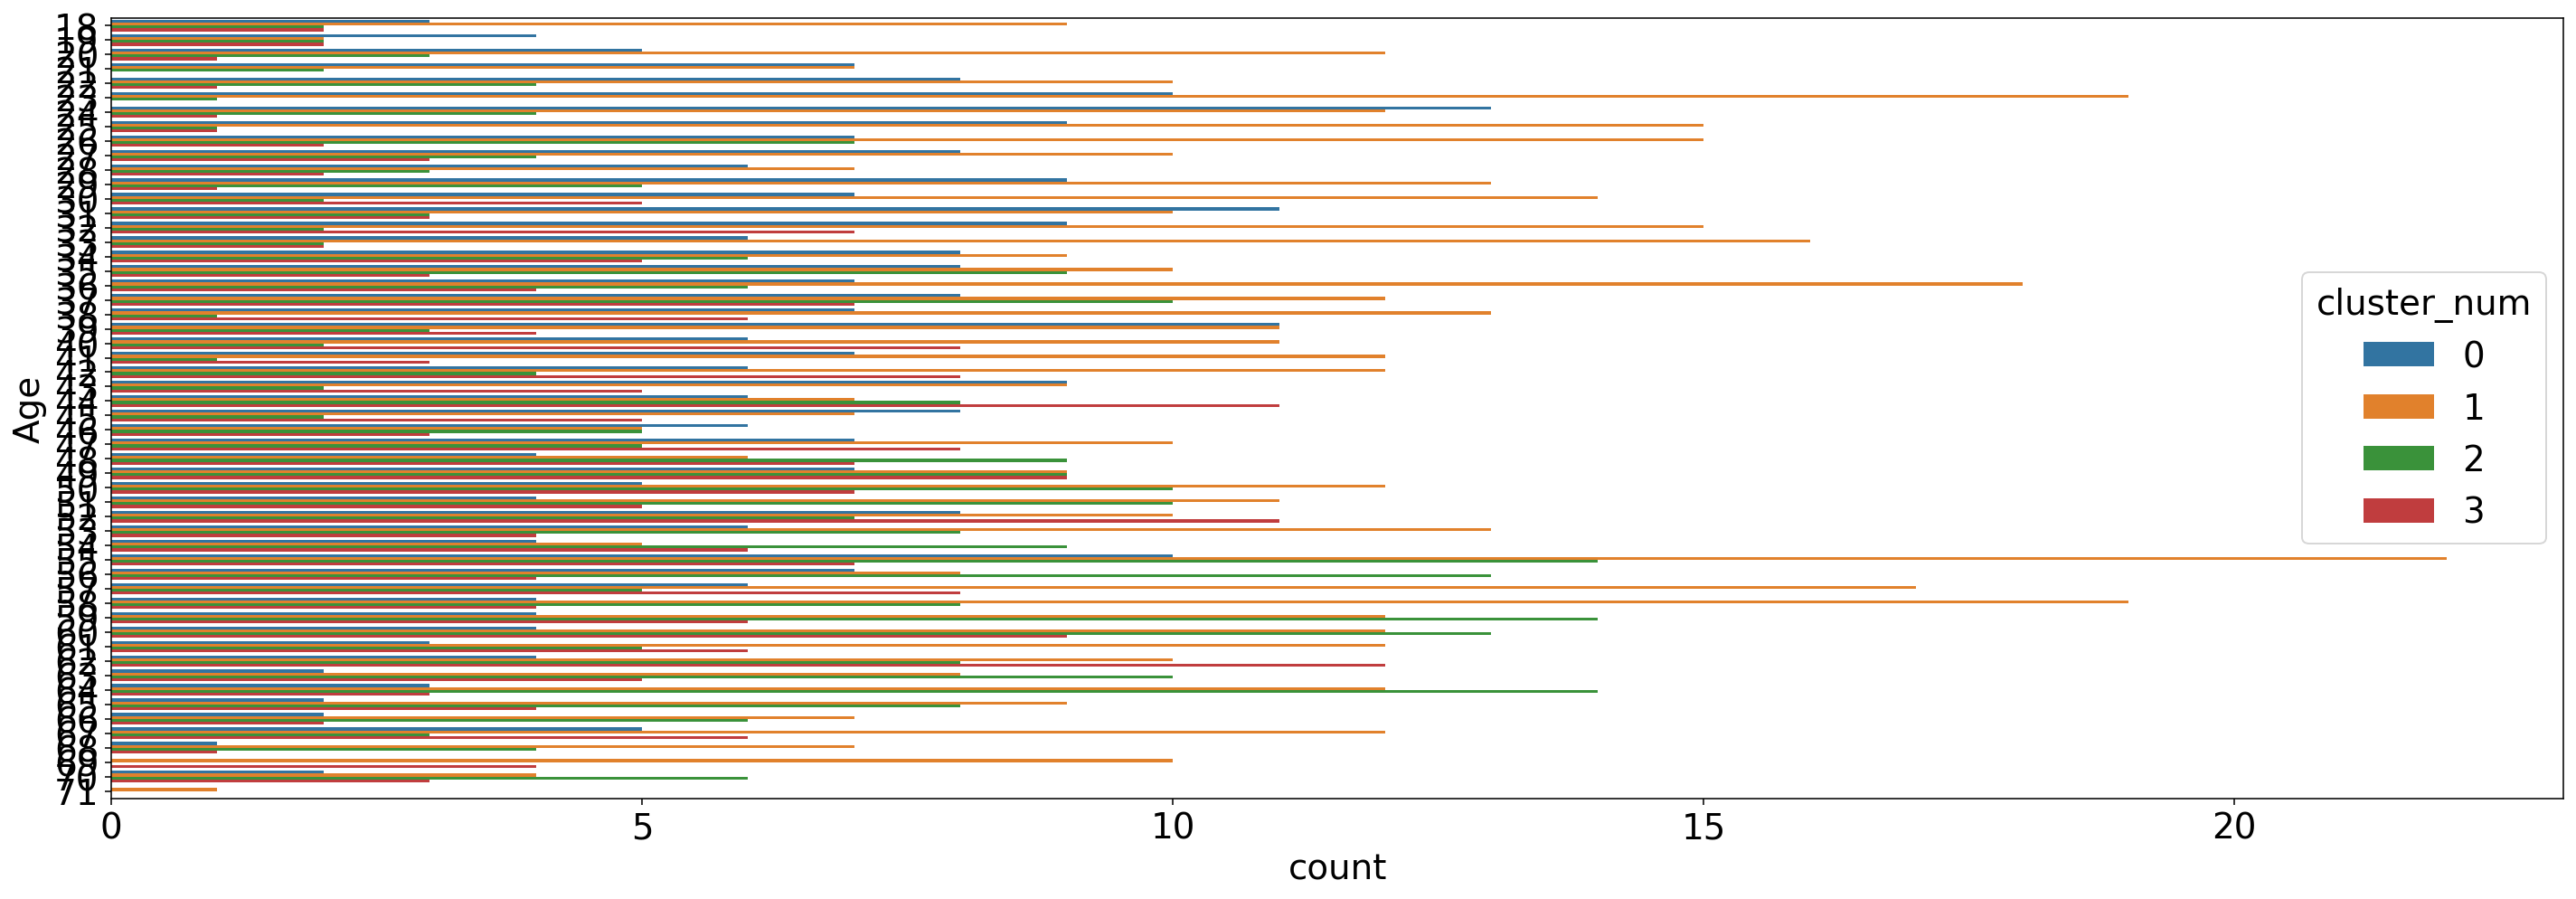

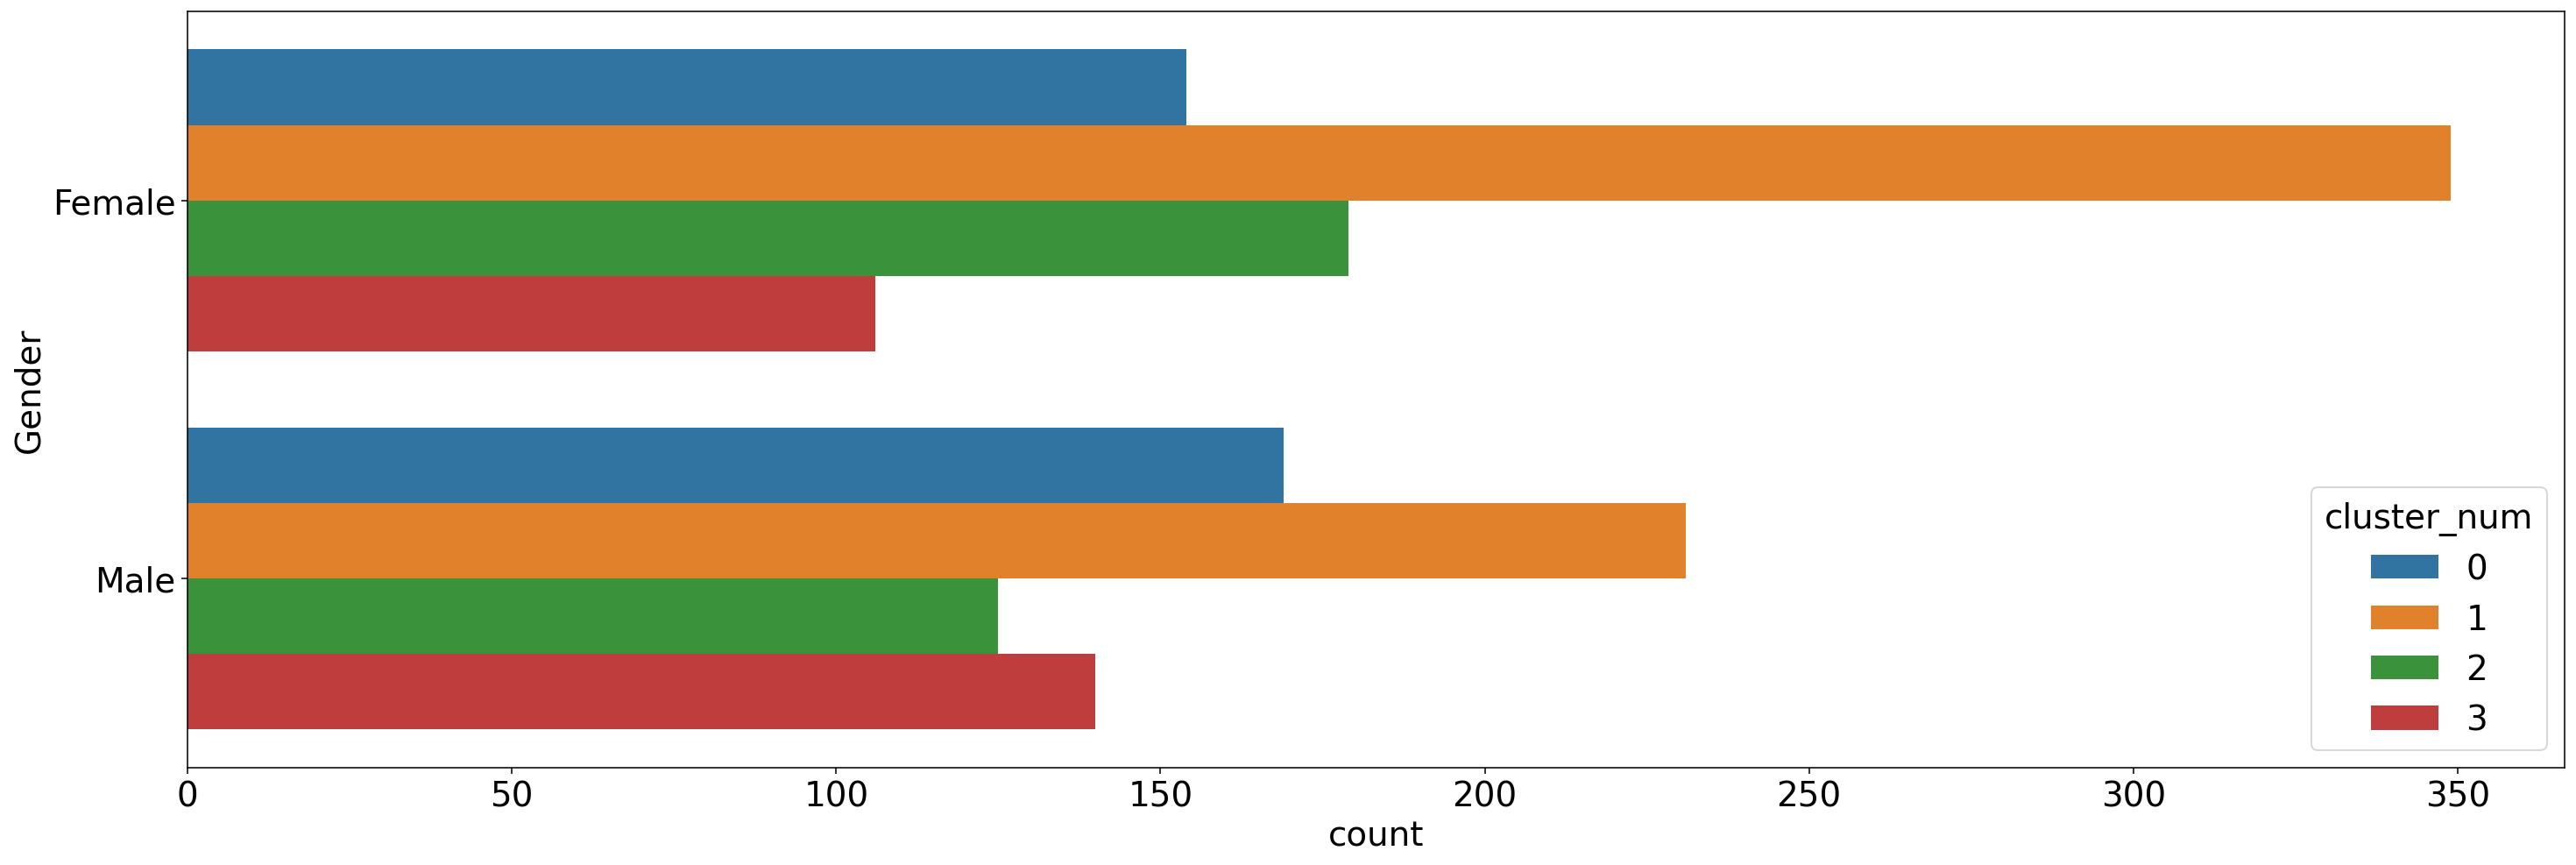

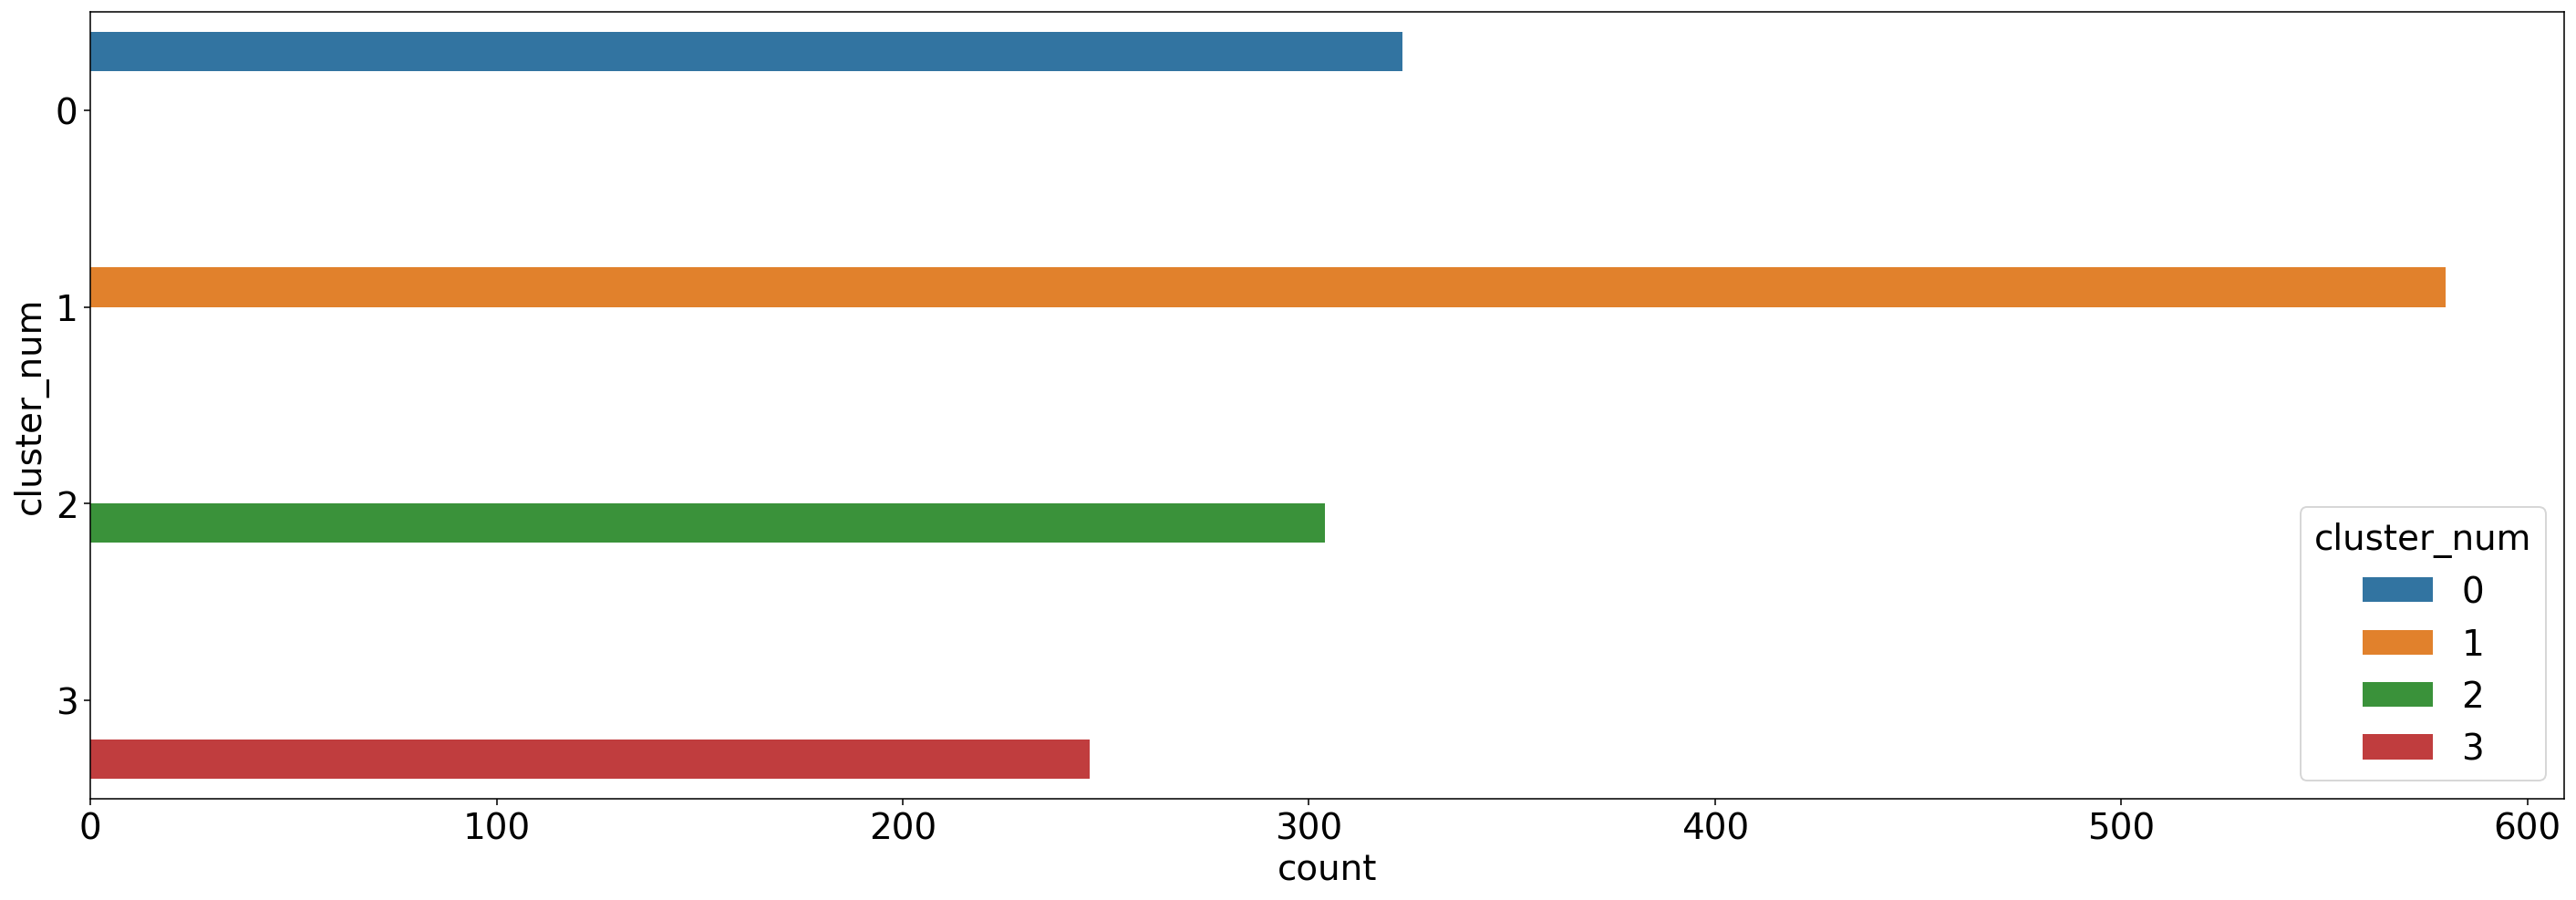

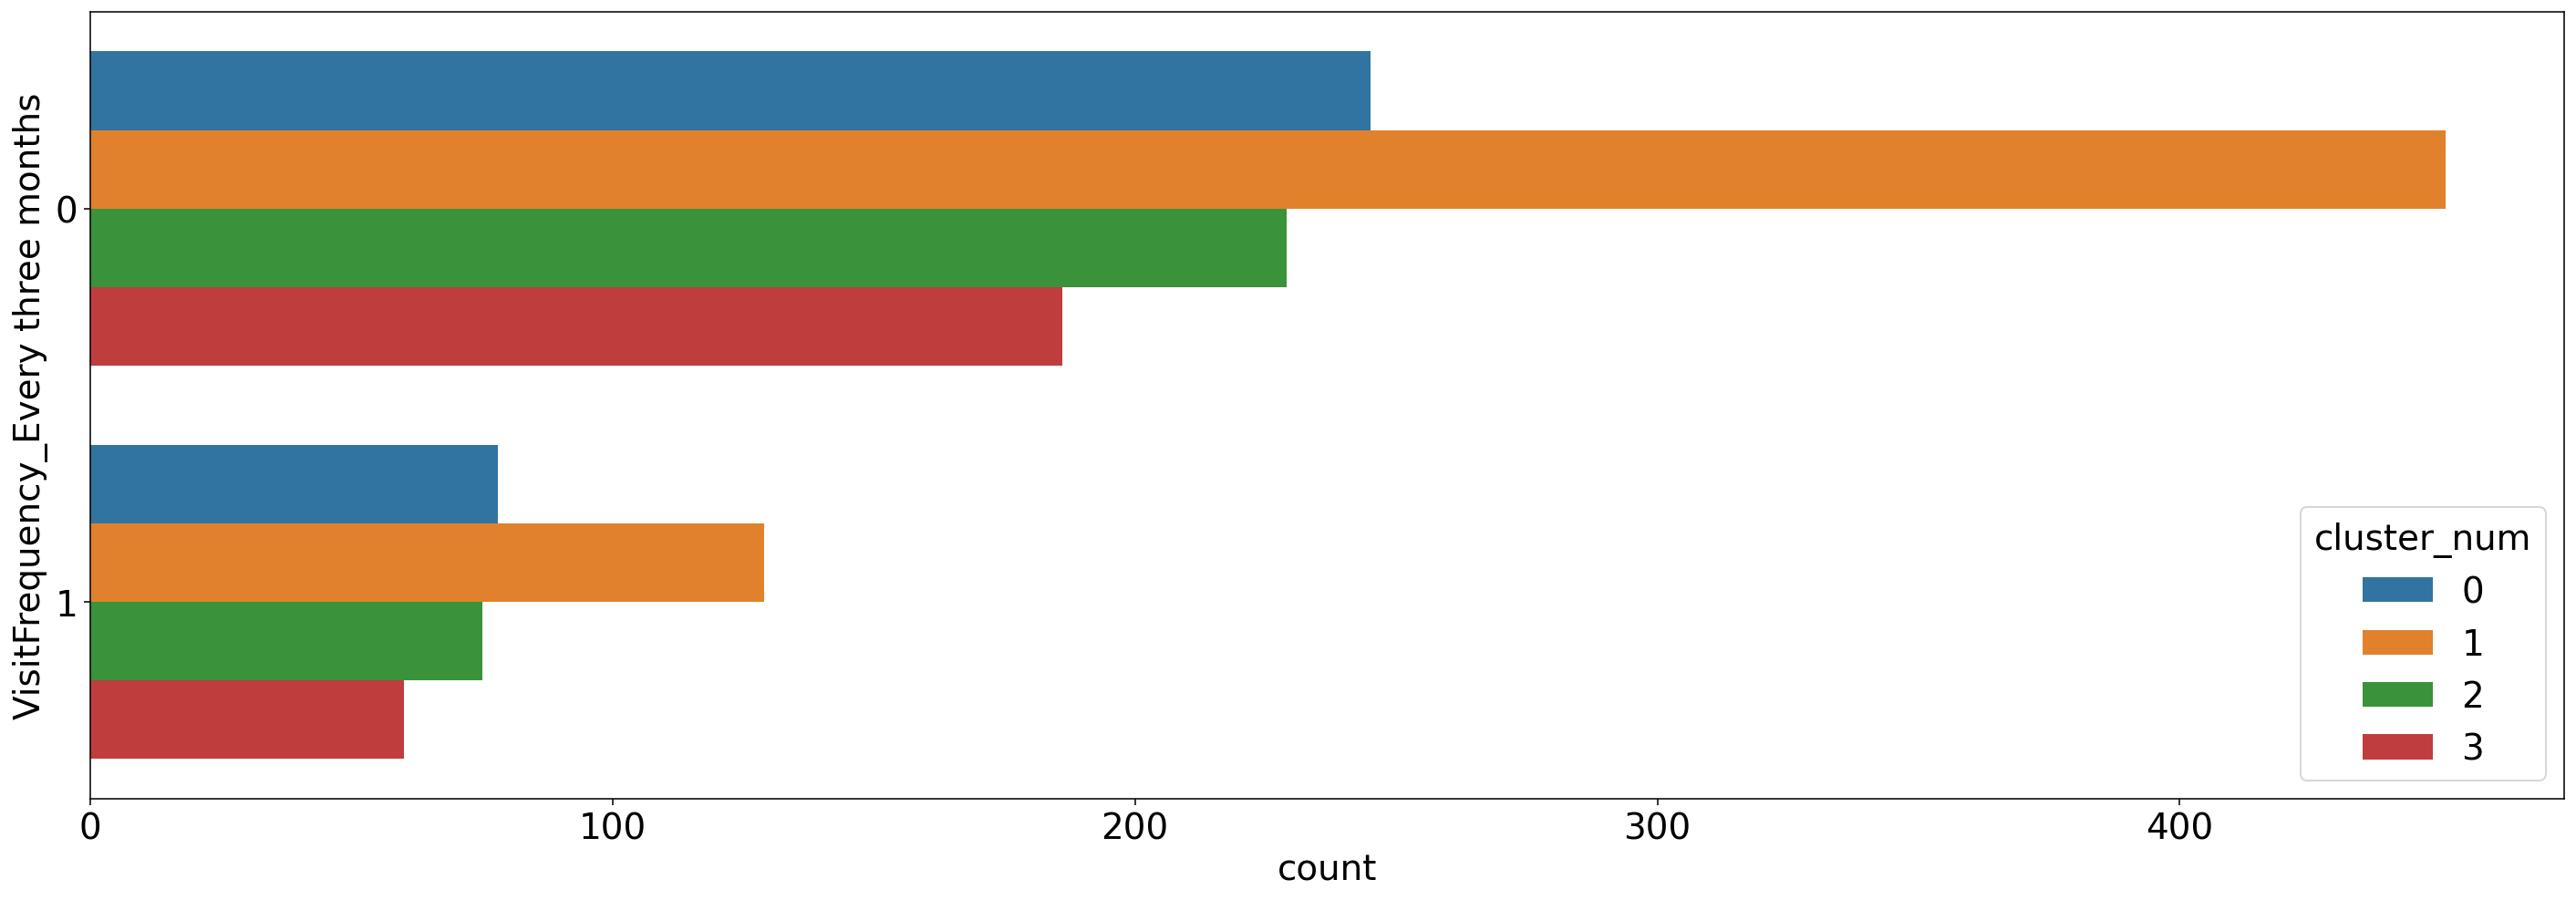

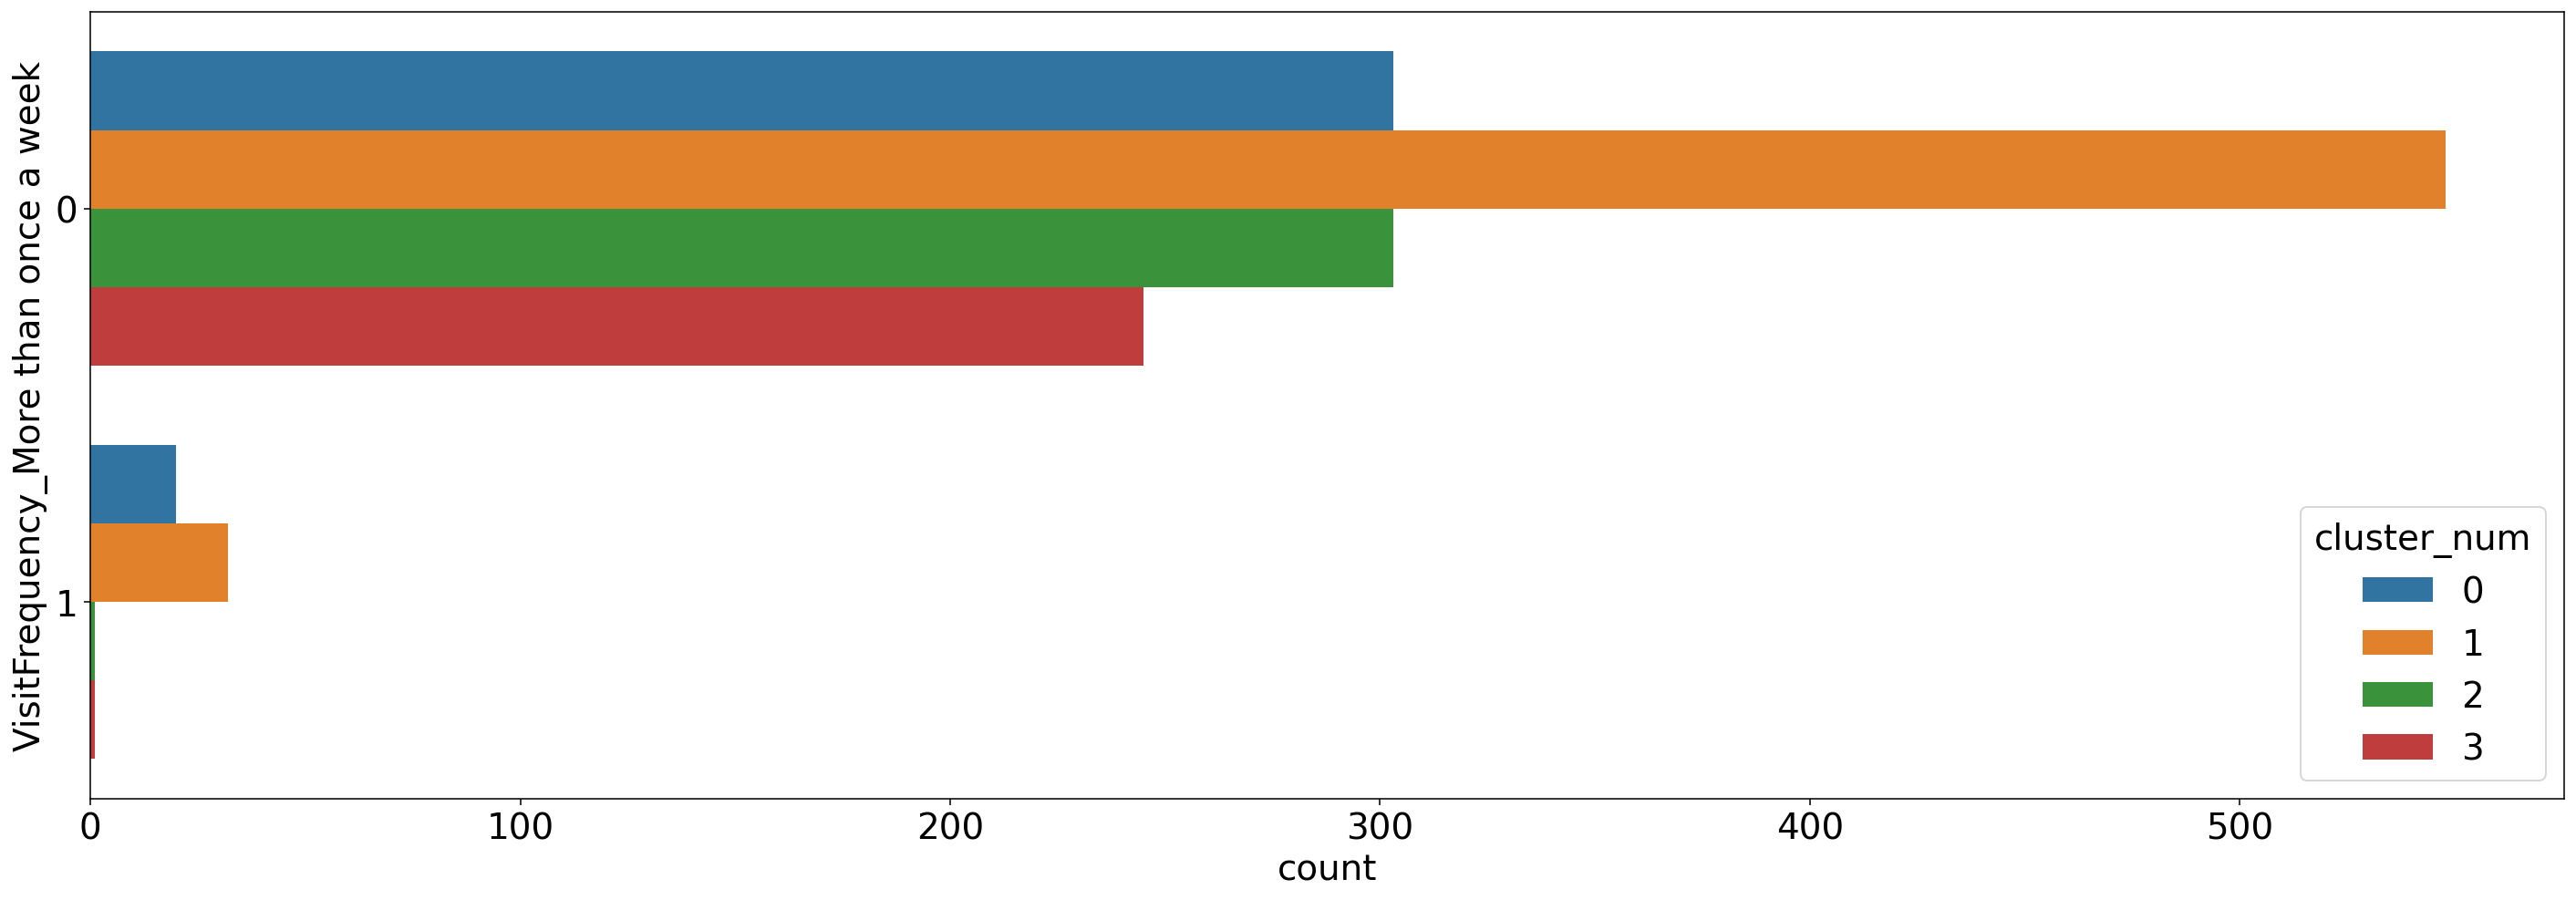

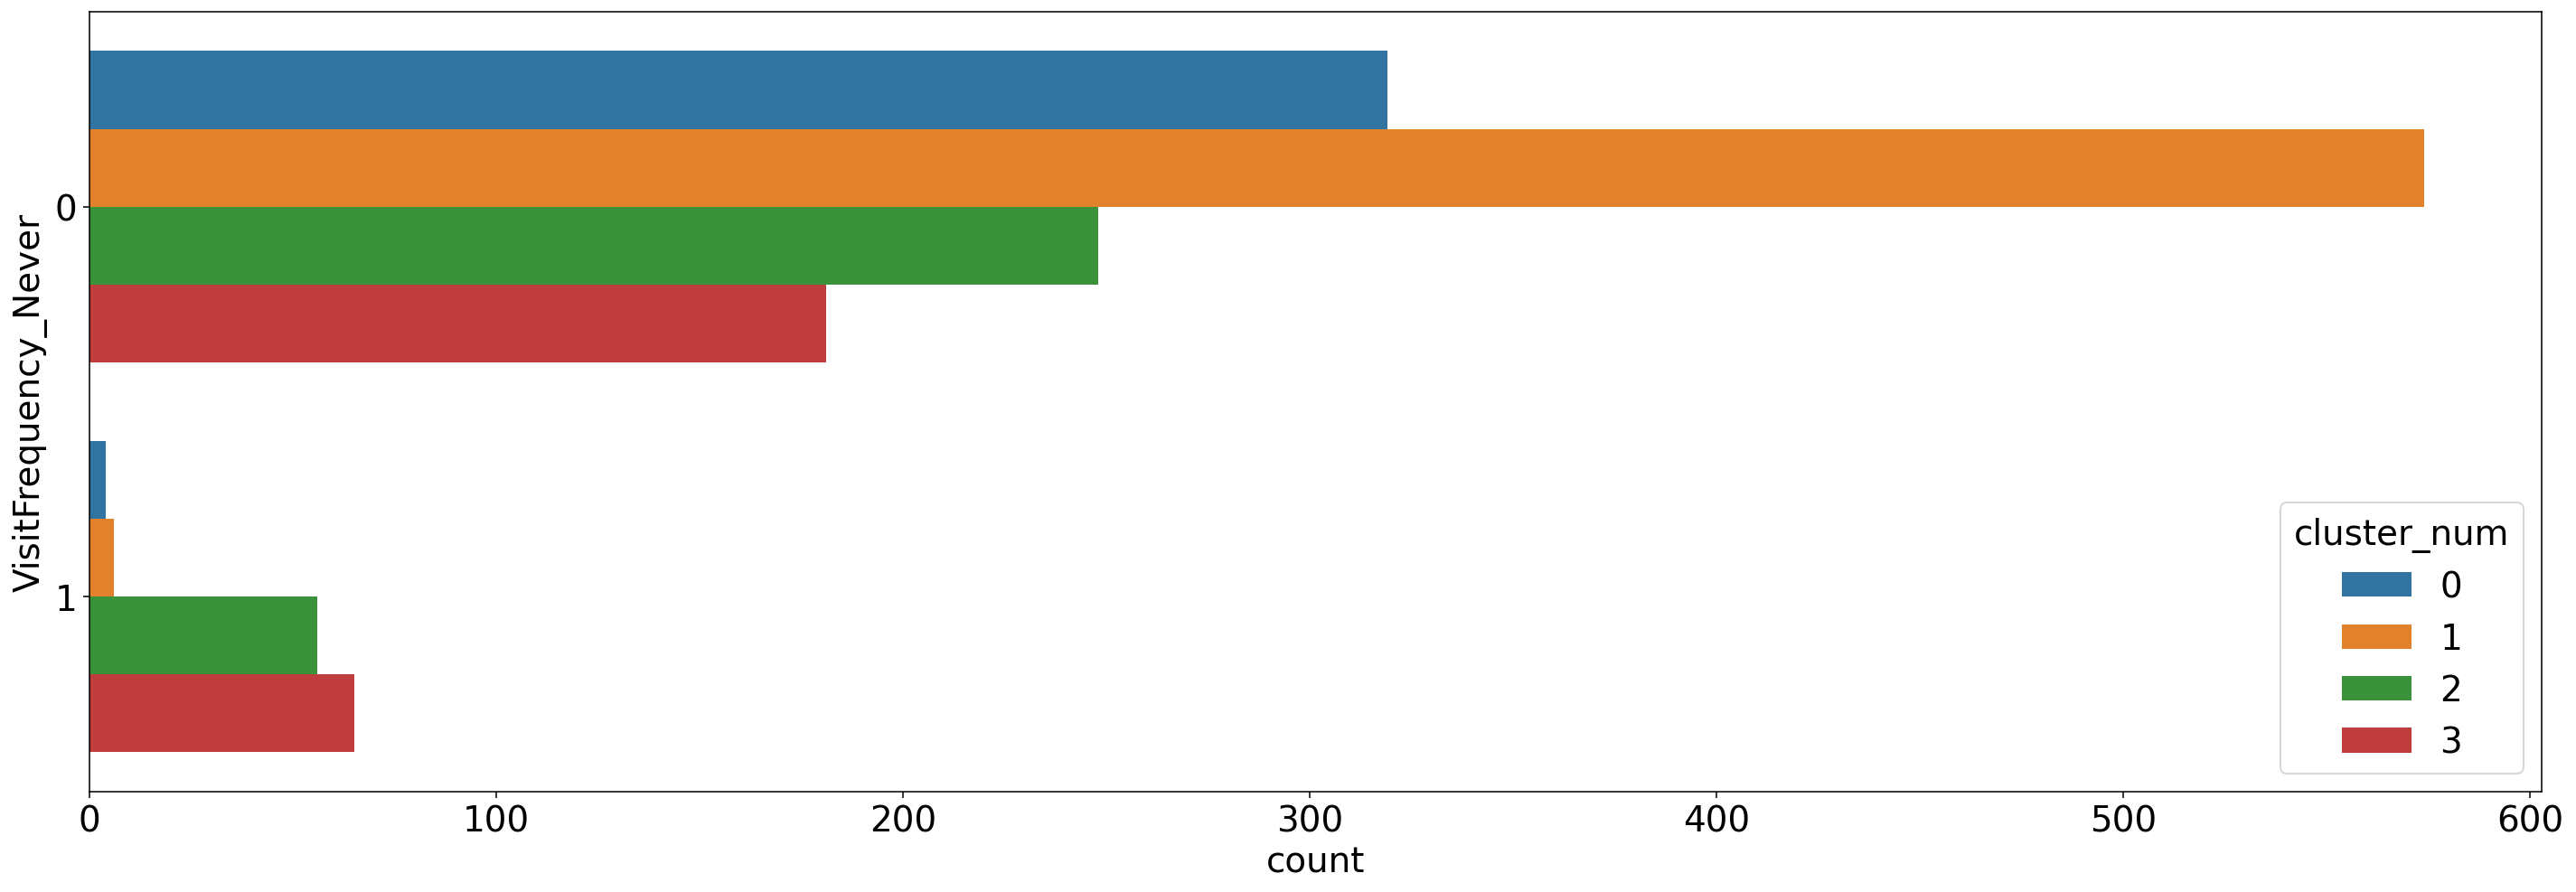

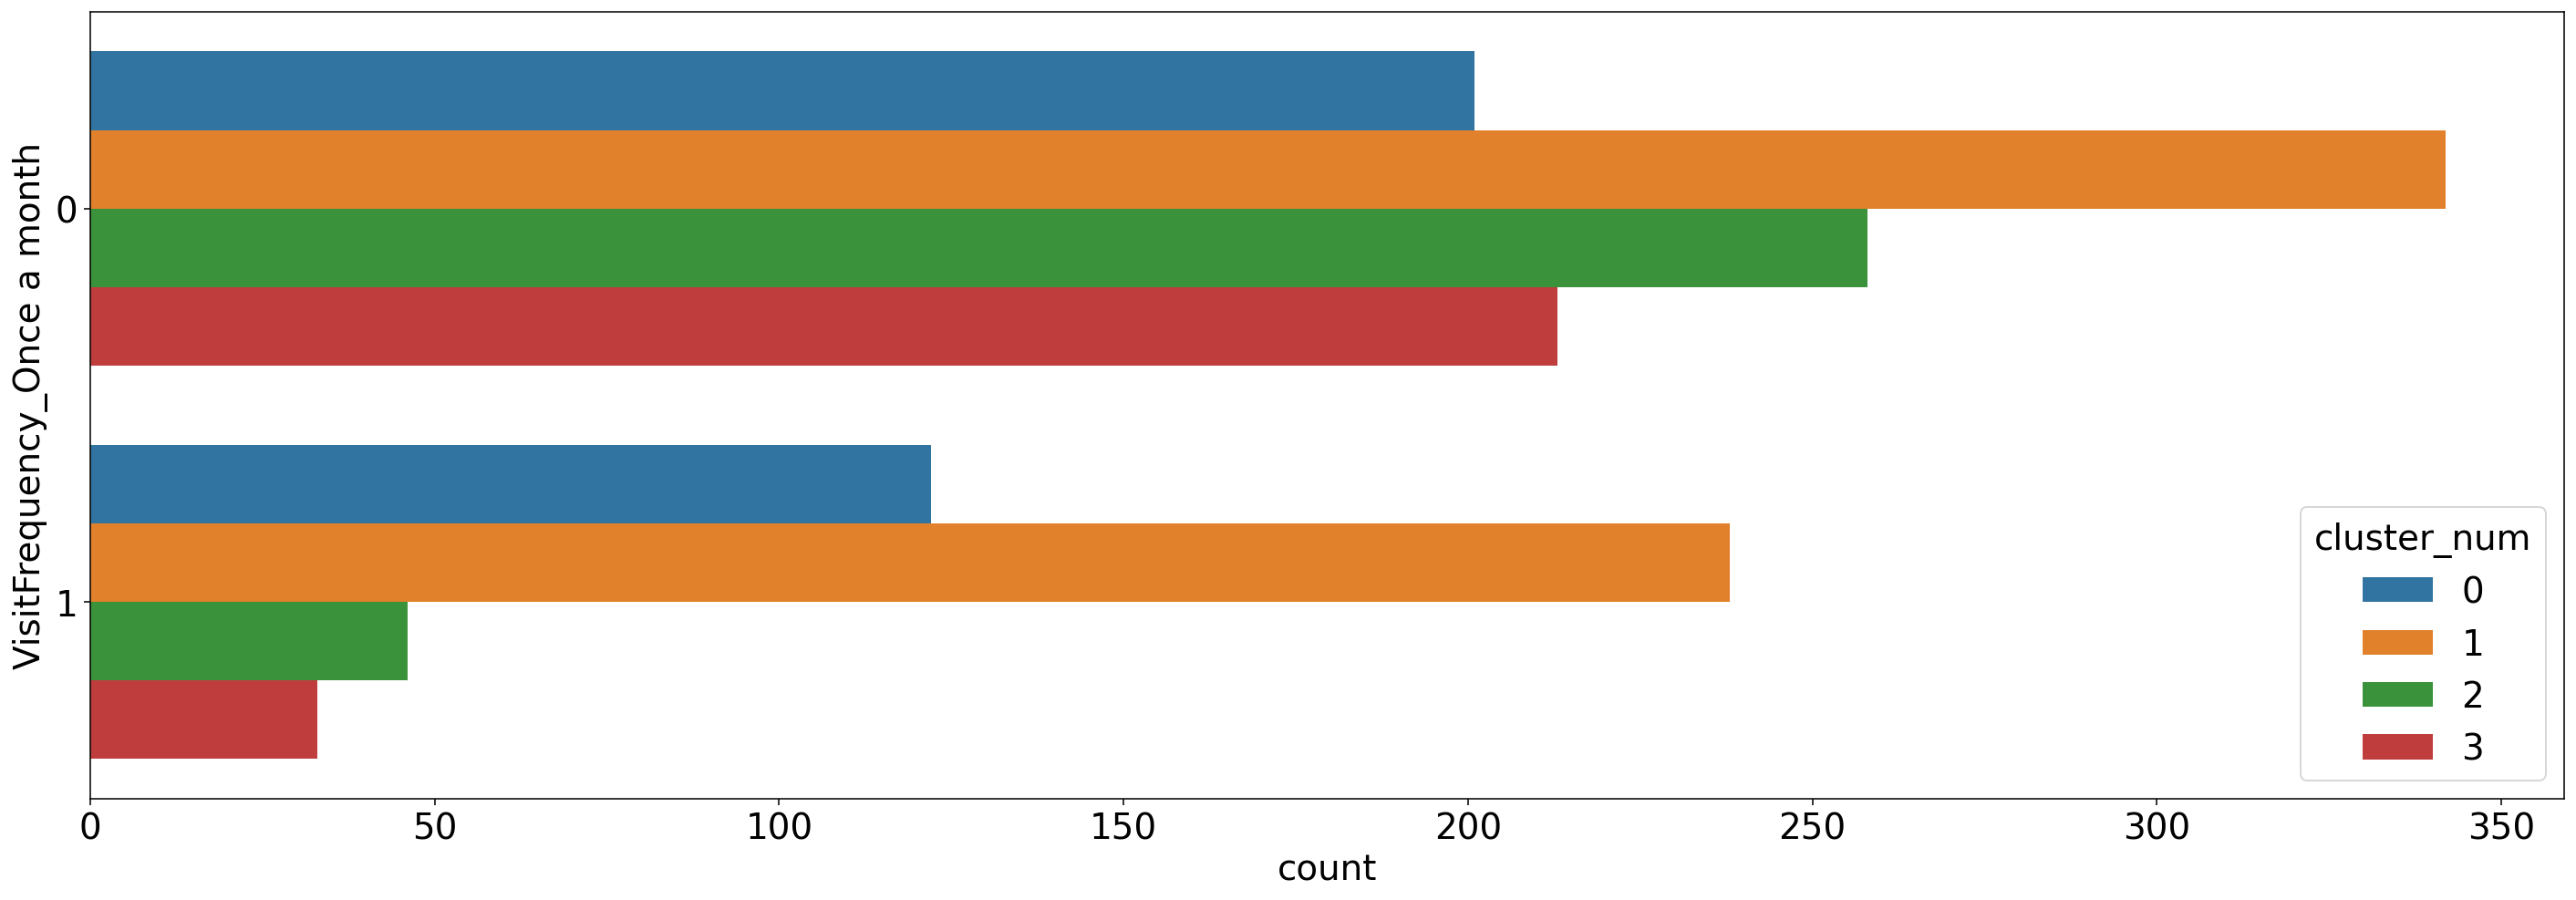

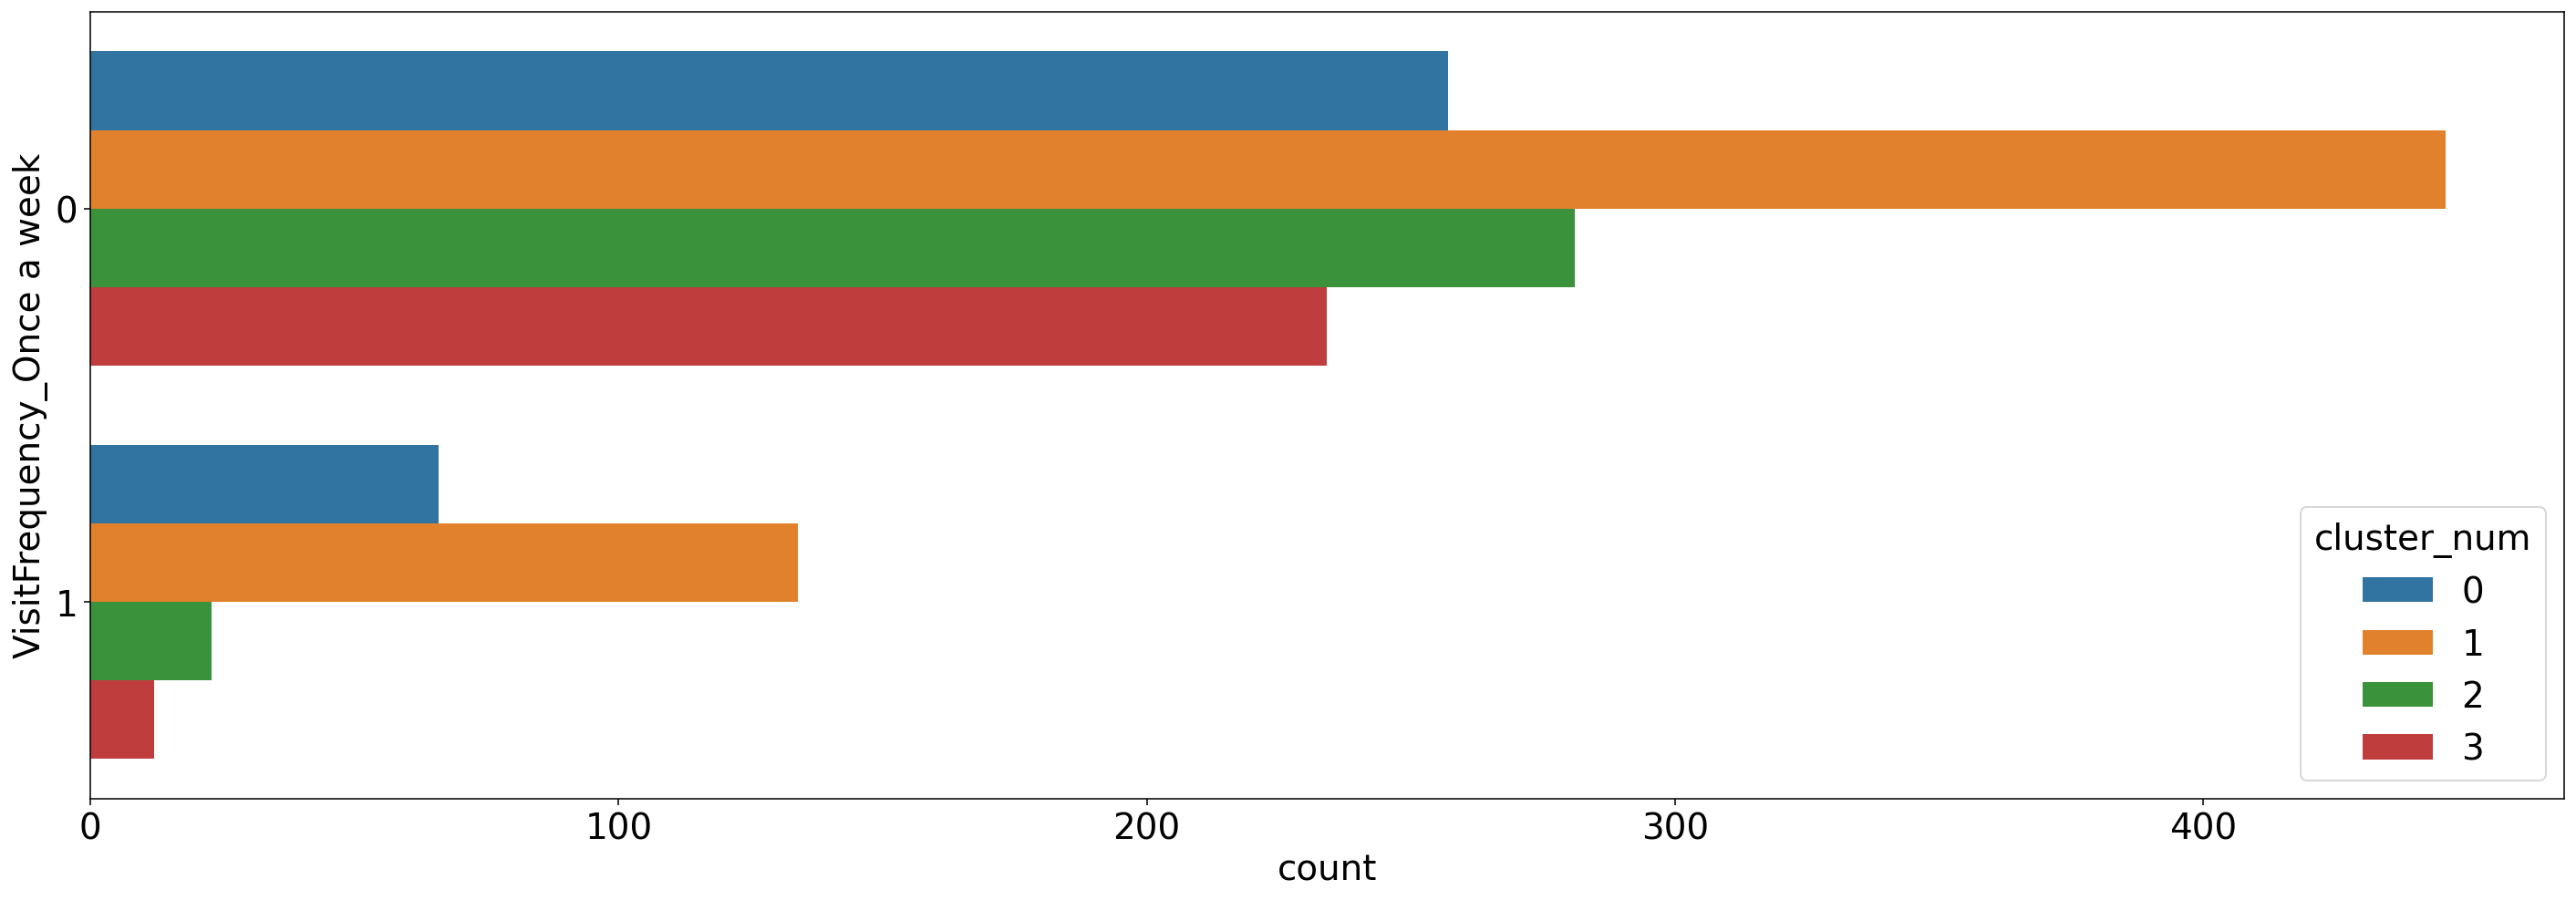

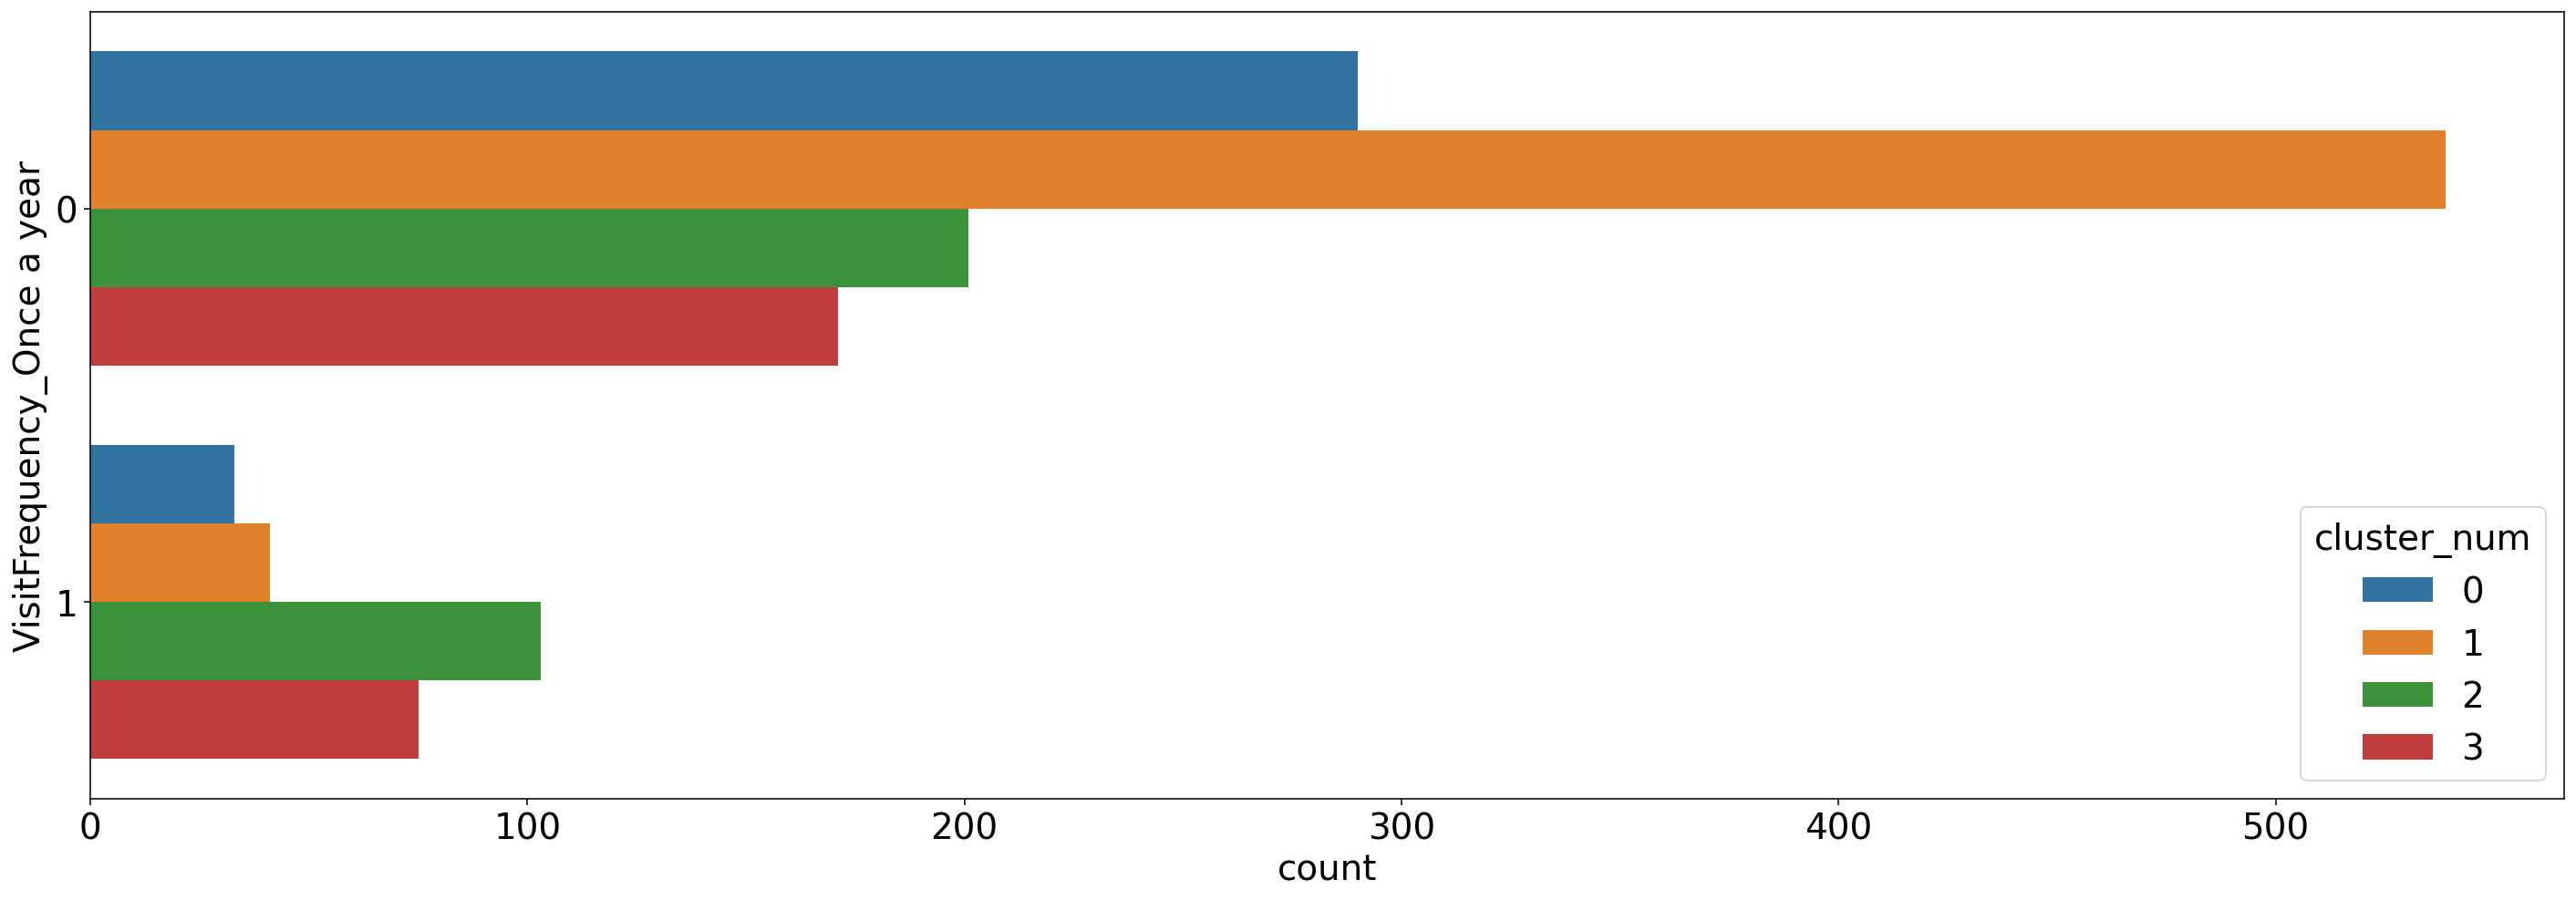

In [65]:
for i in dataset1.columns:
    sns.countplot(y=dataset1[i], hue=dataset1['cluster_num'], data=dataset1)
#plt.rcParams['figure.figsize'] = (25, 8)
    plt.rcParams['figure.dpi'] = 140
    plt.rcParams['font.size'] = 20
    plt.show()

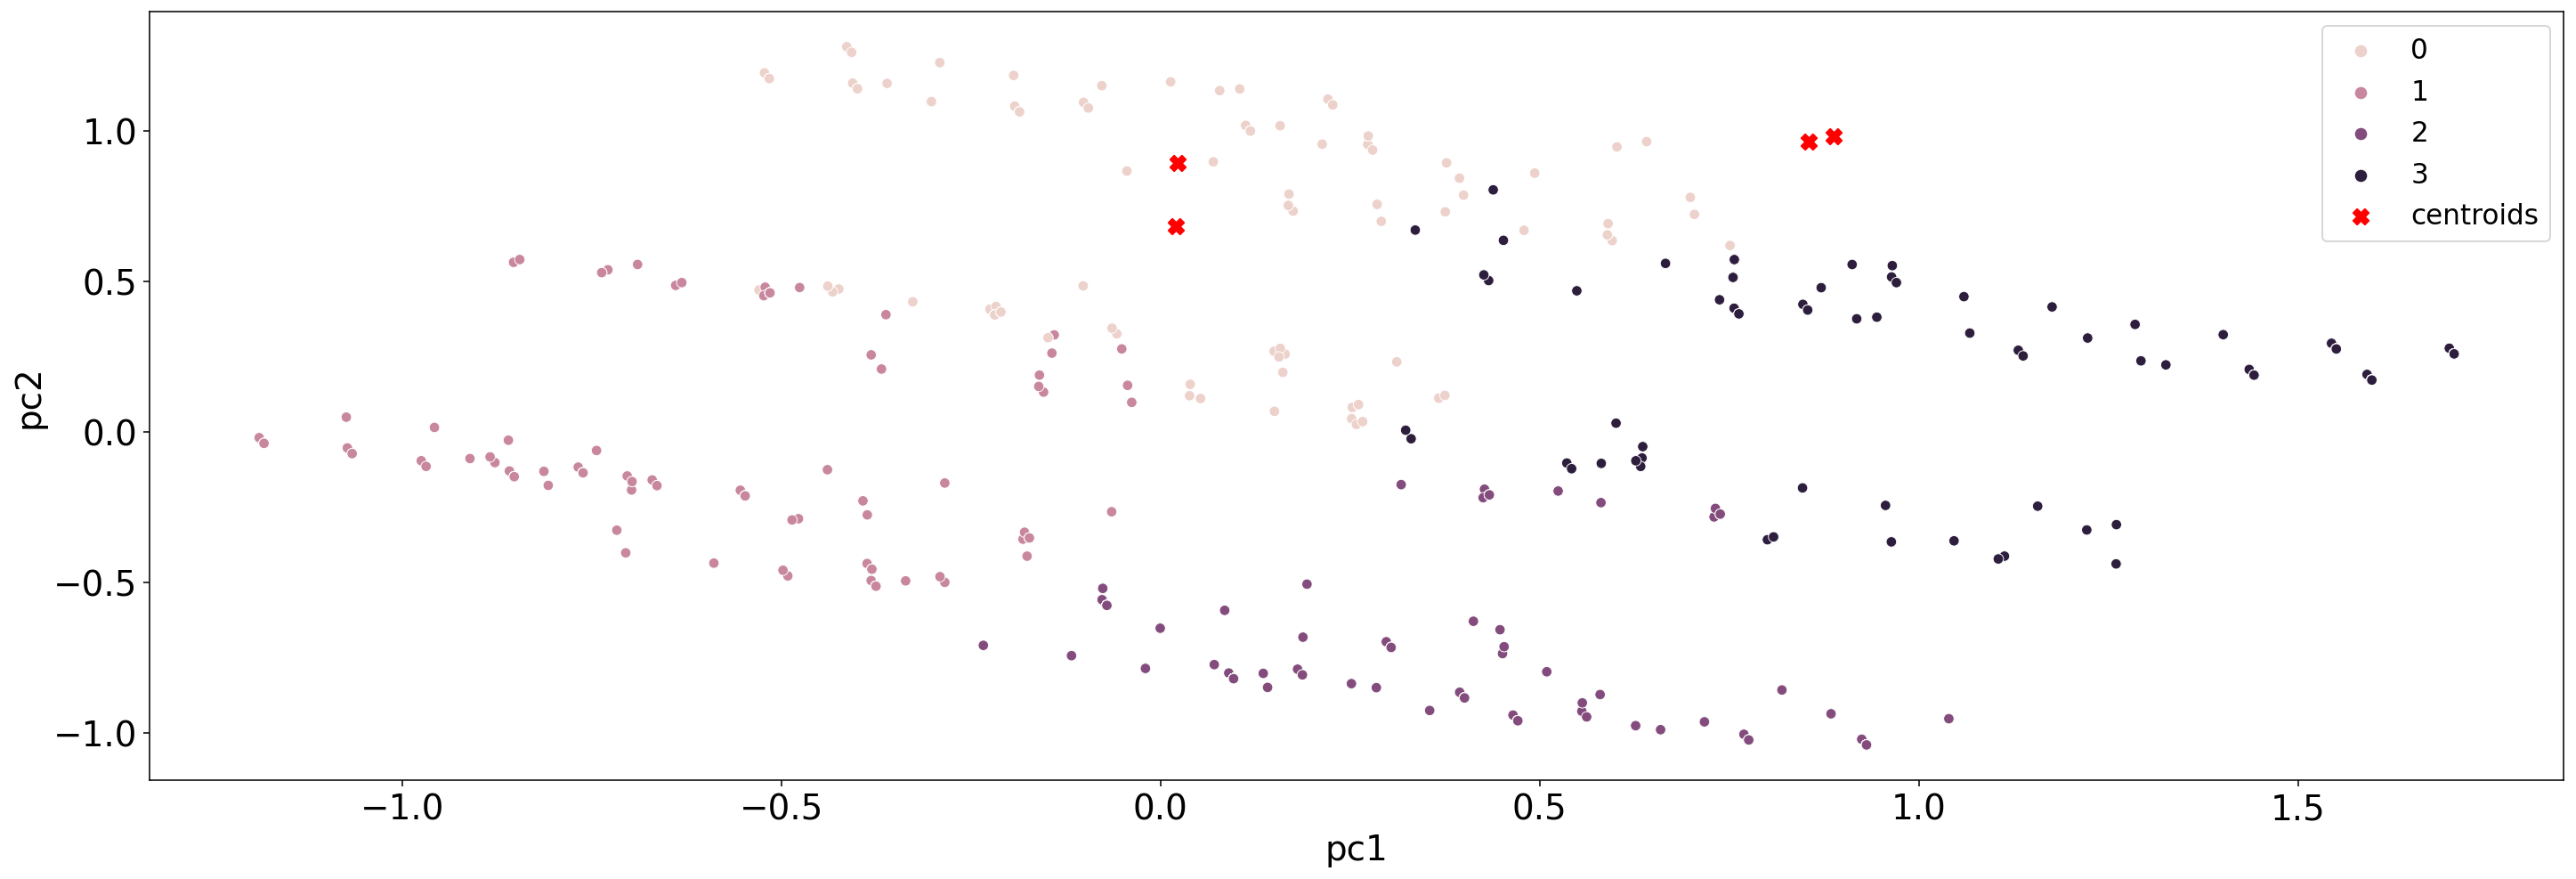

In [66]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.legend()
plt.show()

In [67]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(dataset['cluster_num'],dataset['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


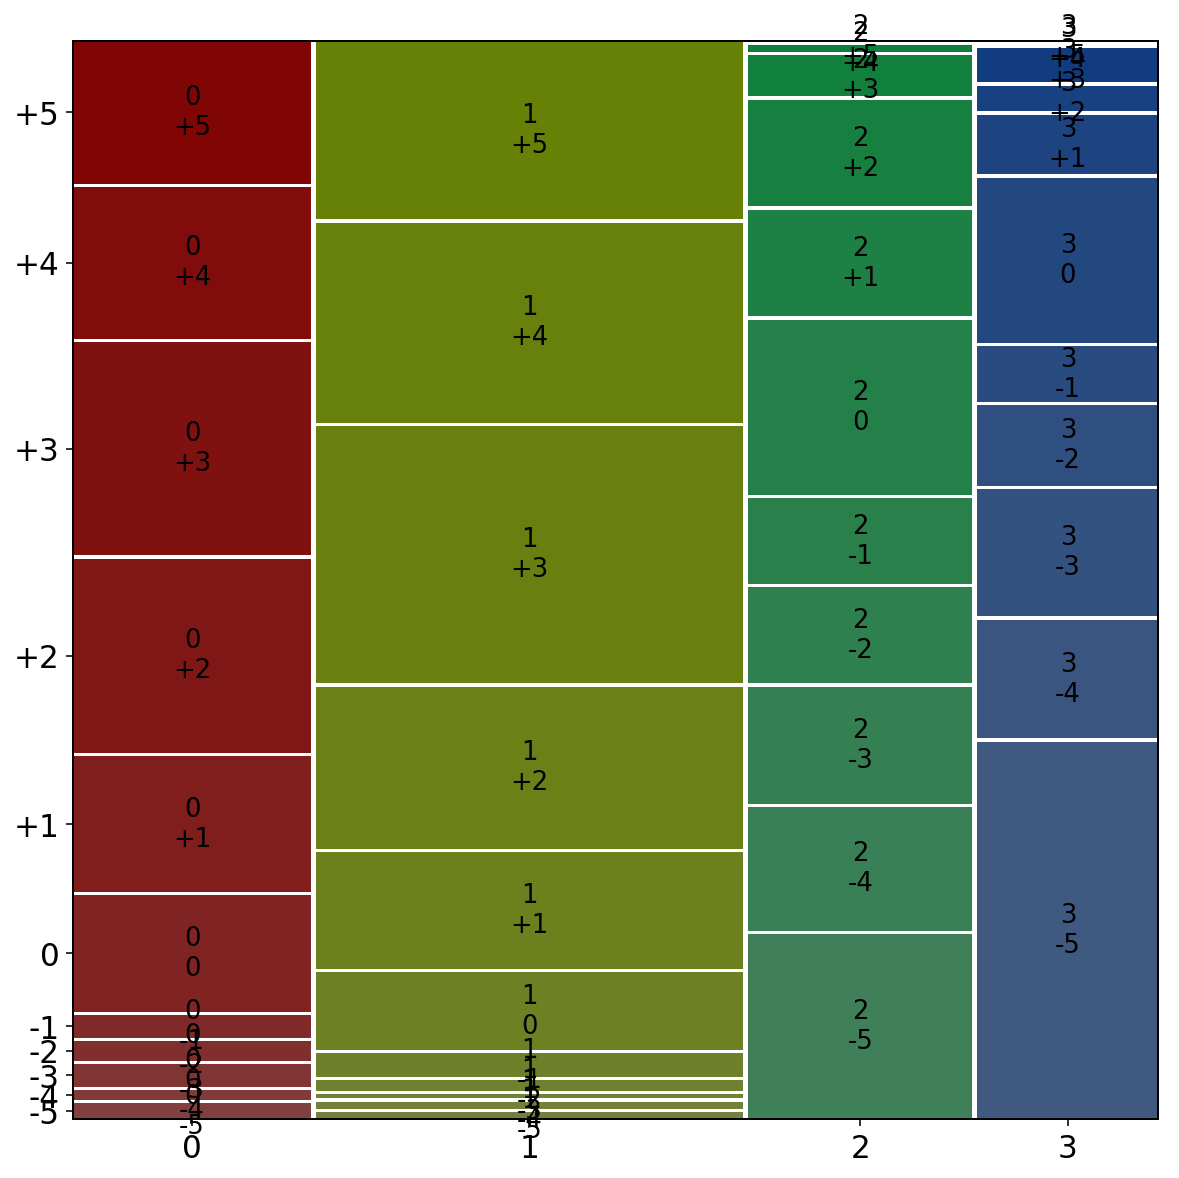

In [68]:
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 5
plt.show()

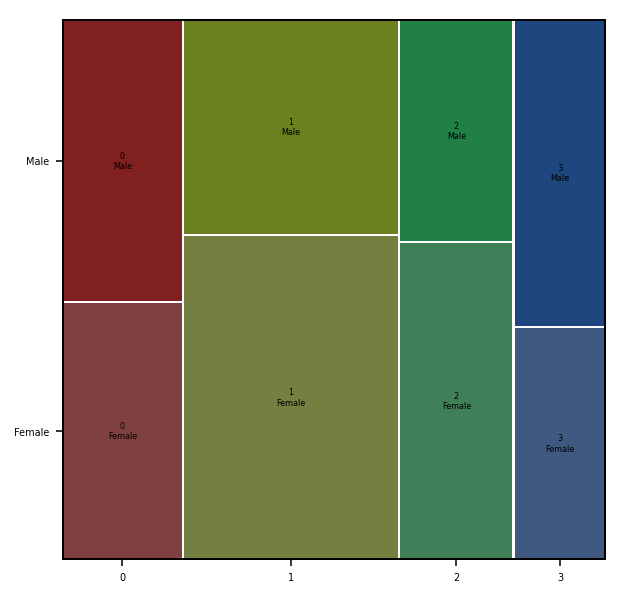

In [69]:
crosstab =pd.crosstab(dataset['cluster_num'],dataset['Gender'])
#Reordering cols
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

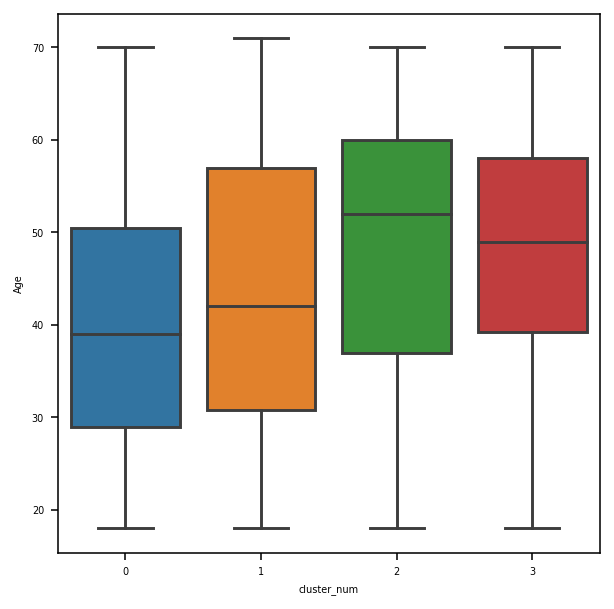

In [70]:
sns.boxplot(x='cluster_num', y='Age', data=dataset1)

In [71]:
#step6
!pip install bioinfokit

In [72]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
from bioinfokit.visuz import cluster

In [74]:
mcdata = pd.read_csv("mcdonalds.csv") #loading the dataset

In [75]:
print(mcdata.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


In [76]:
mcdata.shape

(1453, 15)

In [77]:
mcdata.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [78]:
mcdata.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [79]:
mcdata['Gender'].value_counts()
mcdata['VisitFrequency'].value_counts()
mcdata['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

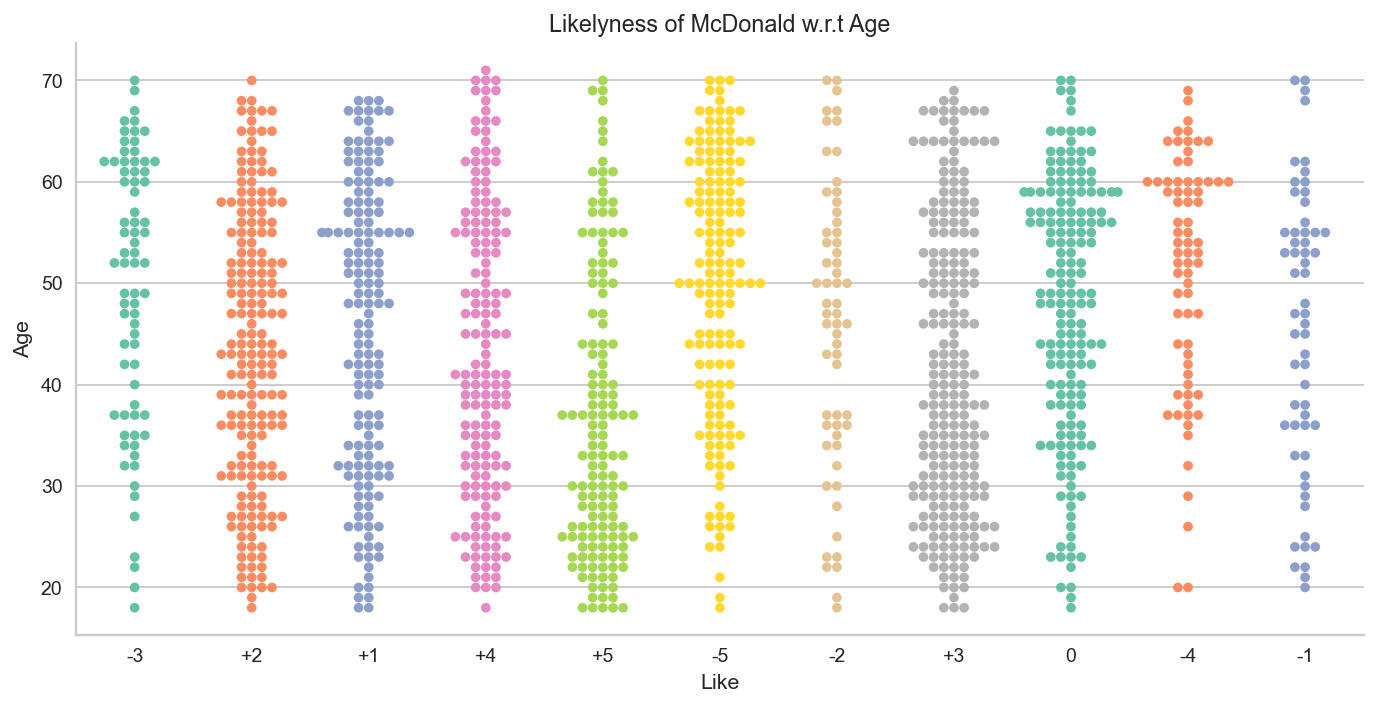

In [80]:
mcdata['Like']= mcdata['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=mcdata, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [81]:
def labelling(x):
    mcdata[x] = LabelEncoder().fit_transform(mcdata[x])
    return mcdata

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcdata

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


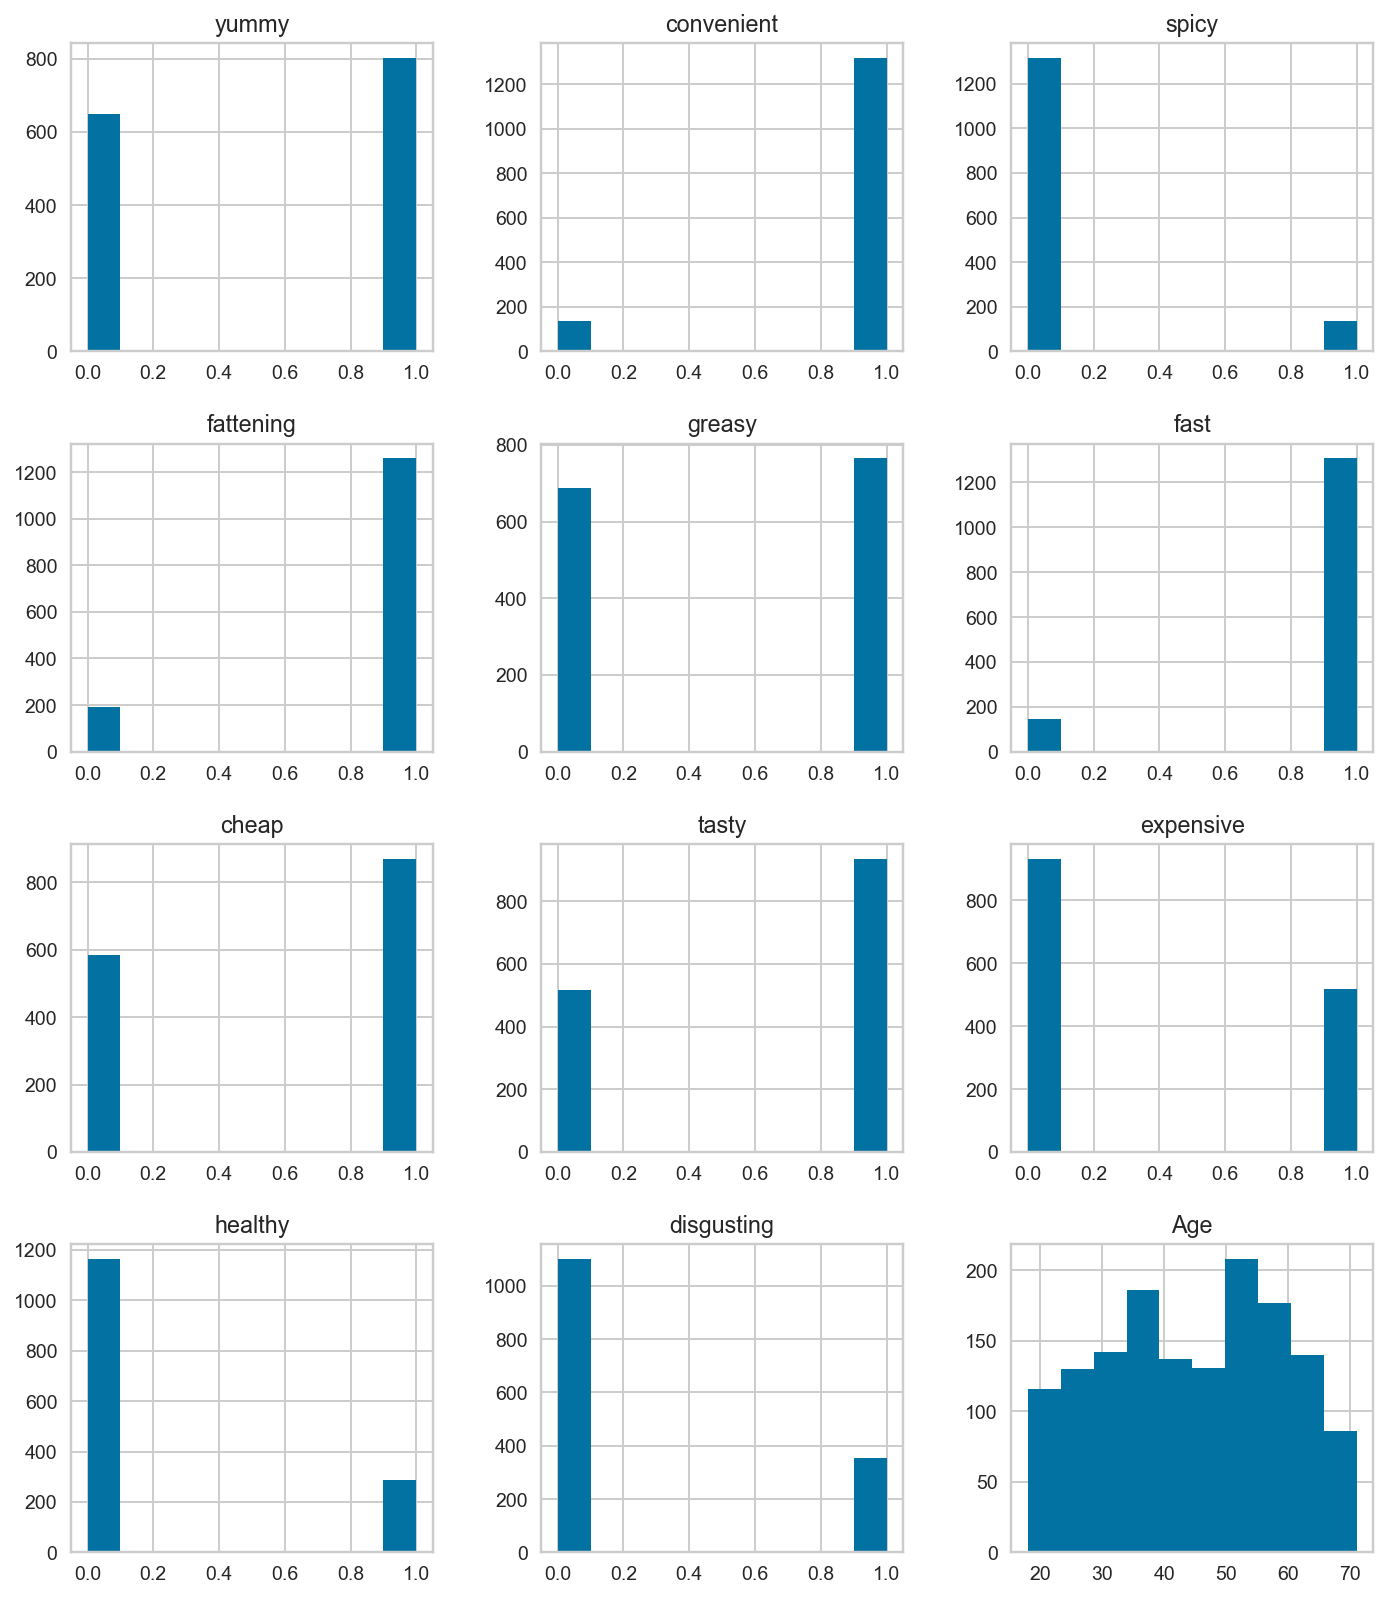

In [82]:
plt.rcParams['figure.figsize'] = (12,14)
mcdata.hist()
plt.show()

In [83]:
mcdata_eleven = mcdata.loc[:,cat]
mcdata_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [84]:
x = mcdata.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [85]:
pca_data = preprocessing.scale(x)
pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [86]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [87]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [88]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_mcdata = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_mcdata['variable'] = mcdata_eleven.columns.values
loadings_mcdata = loadings_mcdata.set_index('variable')
loadings_mcdata

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


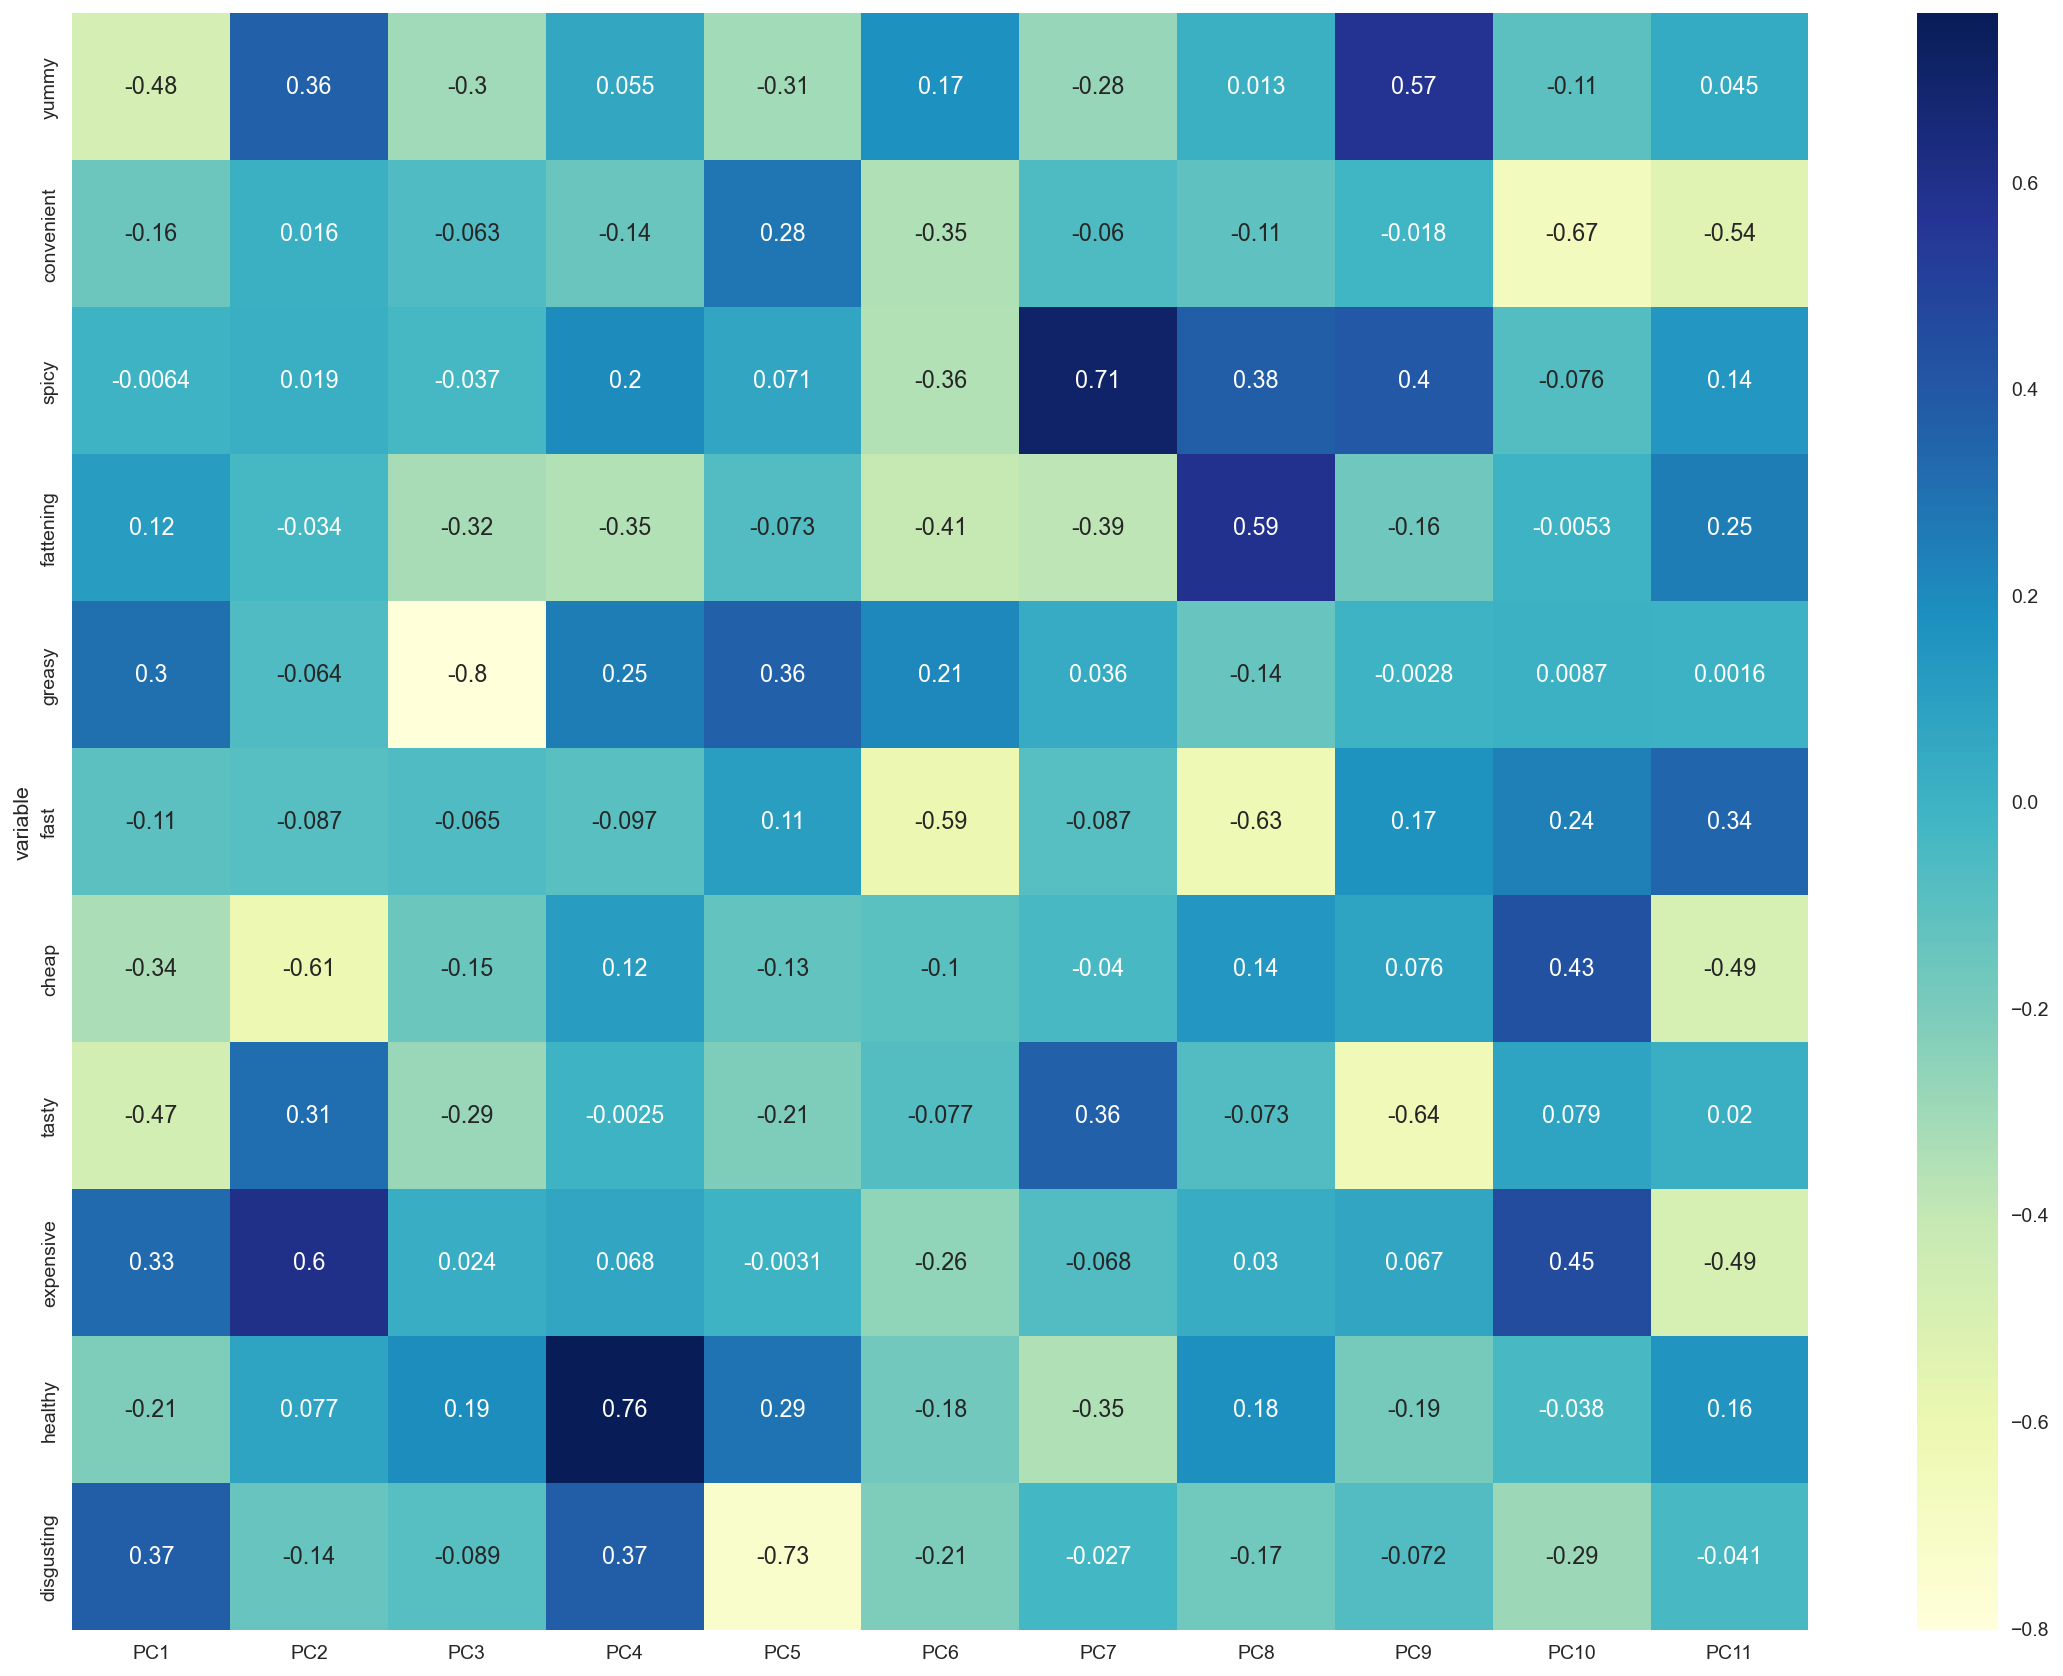

In [89]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_mcdata, annot=True, cmap='YlGnBu')
plt.show()

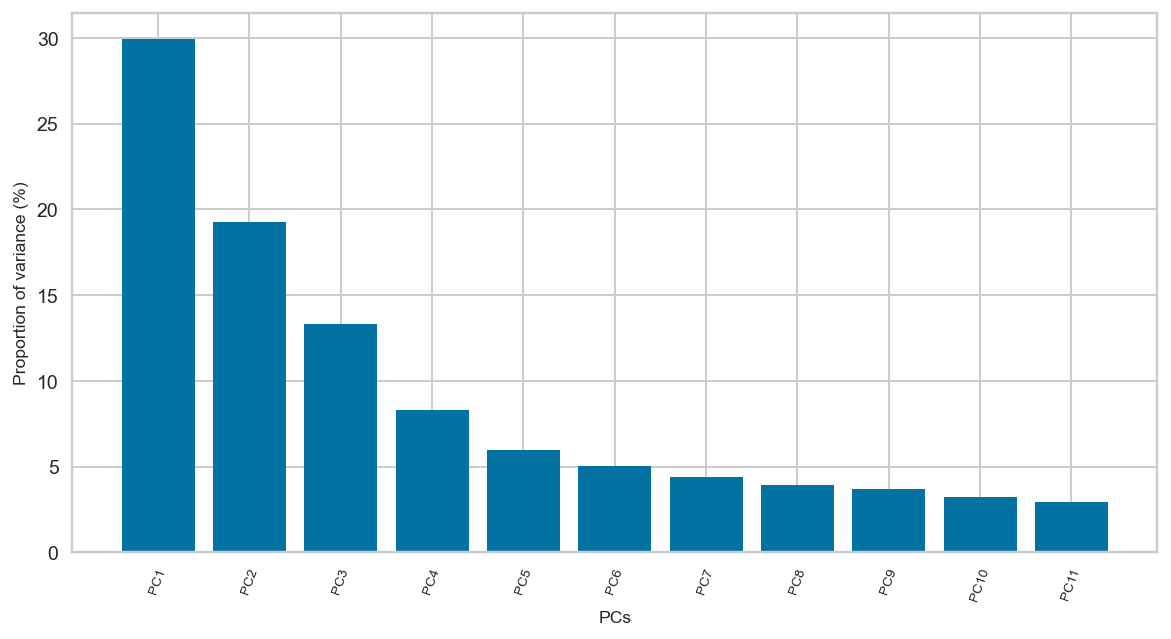

In [90]:
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))